* **target**: daily mean PM2.5 particulate matter concentration in the air, PM2.5 refers to atmospheric particulate matter that have a diameter of less than 2.5 micrometers and is one of the most harmful air pollutants.

* **features** summary:
 * *Weather data*: Humidity, temperature, wind speed... + cloud characteristics from the Sentinel 5P satellite data.
 * *Pollutants data*: From The Sentinel 5P satellite data. This satellite monitors various pollutants in the atmosphere. A mix of pollutans data and statellite metadata (it's recommended to focus on the key measurements, either the column_number_density or the tropospheric_X_column_number_density).

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
raw_train_data = pd.read_csv('../Train.csv')

raw_train_data.shape

(30557, 82)

In [3]:
raw_train_data.head()

Place_ID X Date        Date Place_ID  target  target_min  target_max  \
0  010Q650 X 2020-01-02  2020-01-02  010Q650    38.0        23.0        53.0   
1  010Q650 X 2020-01-03  2020-01-03  010Q650    39.0        25.0        63.0   
2  010Q650 X 2020-01-04  2020-01-04  010Q650    24.0         8.0        56.0   
3  010Q650 X 2020-01-05  2020-01-05  010Q650    49.0        10.0        55.0   
4  010Q650 X 2020-01-06  2020-01-06  010Q650    21.0         9.0        52.0   

   target_variance  target_count  precipitable_water_entire_atmosphere  \
0           769.50            92                             11.000000   
1          1319.85            91                             14.600000   
2          1181.96            96                             16.400000   
3          1113.67            96                              6.911948   
4          1164.82            95                             13.900001   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                          60.200001                            0.00804   
1                          48.799999                            0.00839   
2                          33.400002                            0.00750   
3                          21.300001                            0.00391   
4                          44.700001                            0.00535   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                    18.516840                              1.996377   
1                    22.546533                              3.330430   
2                    27.031030                              5.065727   
3                    23.971857                              3.004001   
4                    16.816309                              2.621787   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                             -1.227395                          0.000074   
1                             -1.188108                          0.000076   
2                              3.500559                          0.000067   
3                              1.099468                          0.000083   
4                              2.670559                          0.000070   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index  \
0                                0.000156                       -1.231330   
1                                0.000197                       -1.082553   
2                                0.000170                       -1.001242   
3                                0.000175                       -0.777019   
4                                0.000142                        0.366323   

   L3_NO2_cloud_fraction  L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0               0.006507           840209.874619                    76.537512   
1               0.018360           840772.941995                   -14.708036   
2               0.015904           841410.713456                  -105.201338   
3               0.055765           841103.242368                  -104.334056   
4               0.028530           840763.055499                    58.850179   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                   38.634284                  -61.736719   
1                   59.624912                  -67.693509   
2                   49.839714                  -78.342701   
3                   29.180977                  -73.896572   
4                    0.797294                  -68.612480   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                  22.358167                                        0.000057   
1                  28.614804                                        0.000055   
2                  34.296977                                        0.000059   
3                  30.545393                                        0.000060   
4                 

In [4]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [5]:
raw_train_data.describe()

target    target_min    target_max  target_variance  \
count  30557.000000  30557.000000  30557.000000     3.055700e+04   
mean      61.148045     29.025866    117.992234     7.983756e+03   
std       46.861309     33.119775    100.417713     4.863090e+04   
min        1.000000      1.000000      1.000000     0.000000e+00   
25%       25.000000      5.000000     60.000000     1.064920e+03   
50%       50.000000     15.000000     91.000000     2.395350e+03   
75%       80.000000     44.000000    155.000000     5.882550e+03   
max      815.000000    438.000000    999.000000     1.841490e+06   

       target_count  precipitable_water_entire_atmosphere  \
count  30557.000000                          30557.000000   
mean     125.831135                             15.302326   
std      146.581856                             10.688573   
min        2.000000                              0.420044   
25%       44.000000                              7.666667   
50%       72.000000                             12.200000   
75%      150.000000                             19.900000   
max     1552.000000                             72.599998   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
count                       30557.000000                       30557.000000   
mean                           70.552747                           0.006004   
std                            18.807884                           0.003787   
min                             5.128572                           0.000139   
25%                            58.600002                           0.003403   
50%                            74.099998                           0.004912   
75%                            85.450001                           0.007562   
max                           100.000000                           0.021615   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
count                 30557.000000                          30557.000000   
mean                      9.321342                              0.416886   
std                       9.343226                              2.707990   
min                     -34.647879                            -15.559646   
25%                       3.123071                             -1.097864   
50%                       8.478424                              0.222092   
75%                      16.201563                              1.772925   
max                      37.437921                             17.955124   

       v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
count                          30557.000000                      28368.000000   
mean                               0.088486                          0.000094   
std                                2.641924                          0.000094   
min                              -15.023647                         -0.000051   
25%                               -1.415701                          0.000056   
50%                                0.012847                          0.000075   
75%                                1.555559                          0.000111   
max                               15.055530                          0.002998   

       L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index  \
count                            28368.000000                    28368.000000   
mean                                 0.000163                       -1.093982   
std                                  0.000109                        0.610955   
min                                  0.000000                       -3.941742   
25%                                  0.000122                       -1.514681   
50%                                  0.000150                       -1.168333   
75%                                  0.000189                       -0.743363   
max                                  0.002431                        4.8248

In [3]:
raw_test_data = pd.read_csv('../Test.csv')

raw_test_data_columns = raw_test_data.columns.tolist()

raw_train_data_columns = raw_train_data.columns.tolist()

non_features = [column for column in raw_train_data_columns if column not in raw_test_data_columns]

non_features

['target', 'target_min', 'target_max', 'target_variance', 'target_count']

In [13]:
for city in list(raw_test_data['Place_ID'].unique()):
    
    if city not in list(raw_train_data['Place_ID'].unique()):
        
        print('{} is not in training data!'.format(city))
        break

0OS9LVX is not in training data!


* *non features*: 'target', 'target_min', 'target_max', 'target_variance', 'target_count', Place_ID X Date
* missing values exist
* date to be converted from string to datetime
* maybe scaling needs to be done

**assumptions**: 
* *non features*: metadata, Place_ID(some places in test set do not exist in train set), month(coz the train data only covers months 1,2,3,4, even though the test data covers the same months)

In [4]:
## format cell ##

train_data = raw_train_data

train_data['Date'] = pd.to_datetime(raw_train_data['Date'])

train_data['month'] = raw_train_data['Date'].dt.month

train_data['weekday'] = raw_train_data['Date'].dt.weekday

train_data['weekend'] = [1 if i in [5,6] else 0 for i in train_data['weekday']]

train_data[['Date', 'month', 'weekday', 'weekend']].head()

Date  month  weekday  weekend
0 2020-01-02      1        3        0
1 2020-01-03      1        4        0
2 2020-01-04      1        5        1
3 2020-01-05      1        6        1
4 2020-01-06      1        0        0

## Data Viz

In [5]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.style.use('ggplot') #change the style
#plt.rcParams['figure.figsize'] = [20, 10] #increase figure size

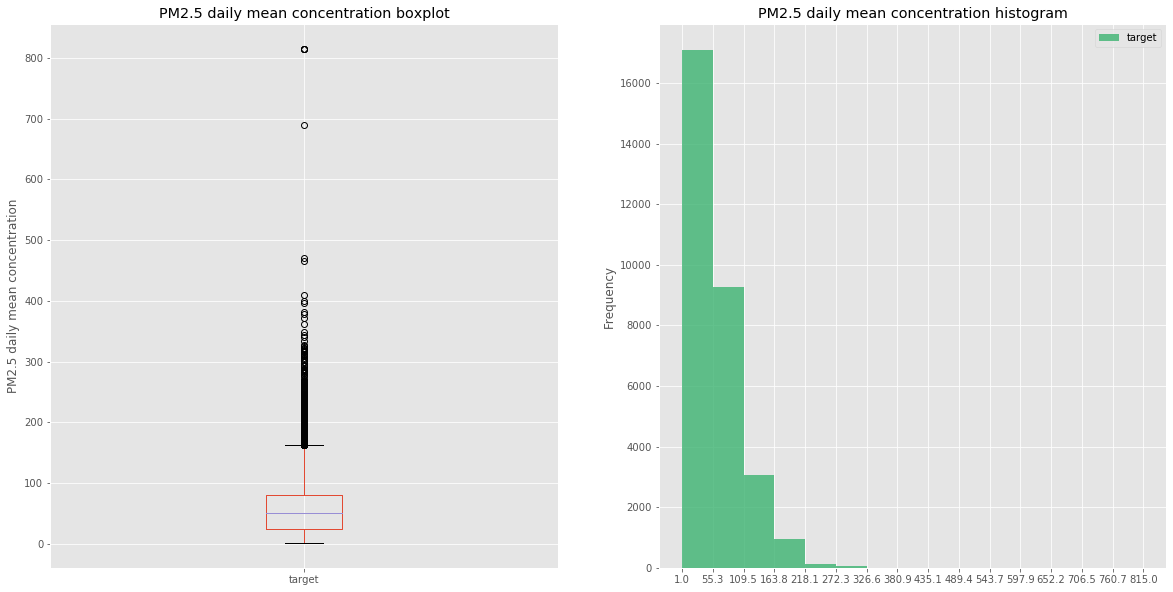

In [6]:
plt.figure(figsize= (20,10)) #Width, height in inches

ax0 = plt.subplot(121)

train_data[['target']].plot(kind= 'box', 'deeppink'ax= ax0)
plt.ylabel('PM2.5 daily mean concentration')
plt.title('PM2.5 daily mean concentration boxplot')

ax1 = plt.subplot(122)

count, bin_edges = np.histogram(train_data[['target']], 15)
train_data[['target']].plot(kind= 'hist',
                            bins= 15,
                            color= 'mediumseagreen',
                            alpha= 0.8, #sets the color's transparency
                            xticks= bin_edges,
                            ax= ax1)
plt.title('PM2.5 daily mean concentration histogram')

plt.show()

### Target by weather

In [6]:
weather_features = ['precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 
       'L3_CLOUD_cloud_base_height',
       'L3_CLOUD_cloud_base_pressure', 'L3_CLOUD_cloud_fraction', 
       'L3_CLOUD_cloud_optical_depth', 'L3_CLOUD_cloud_top_height', 
       'L3_CLOUD_cloud_top_pressure', 'L3_CLOUD_sensor_azimuth_angle', 
       'L3_CLOUD_sensor_zenith_angle', 'L3_CLOUD_solar_azimuth_angle', 
       'L3_CLOUD_solar_zenith_angle', 'L3_CLOUD_surface_albedo']

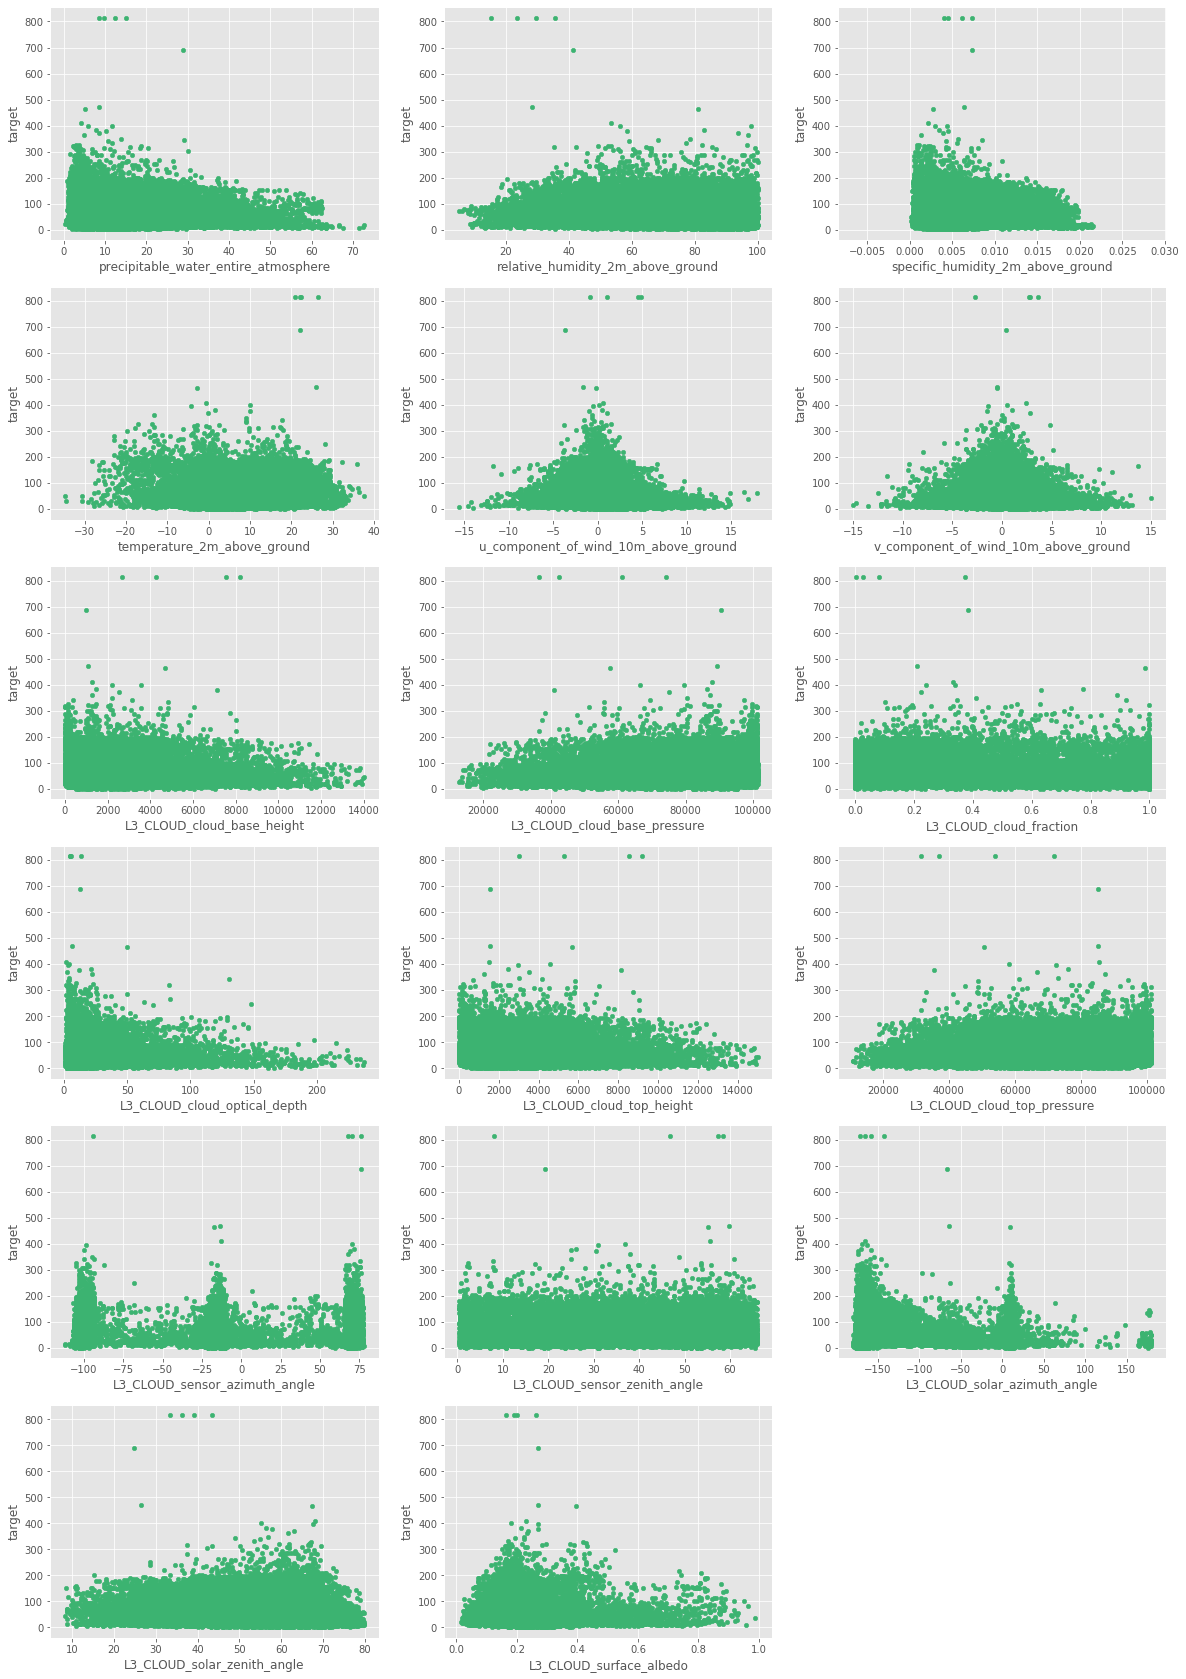

In [7]:
plt.figure(figsize= (20,30))

for i in range(1, len(weather_features) + 1):
    
    ax = plt.subplot(6, 3, i)
    
    train_data.plot(kind= 'scatter',
                    x= weather_features[i-1],
                    y= 'target',
                    color= 'mediumseagreen',
                    ax= ax)

plt.show()

*Clearly* interesting features:

* precipitable_water_entire_atmosphere
* u_component_of_wind_10m_above_ground 
* v_component_of_wind_10m_above_ground
* L3_CLOUD_cloud_optical_depth
* L3_CLOUD_sensor_azimuth_angle

### Target by time

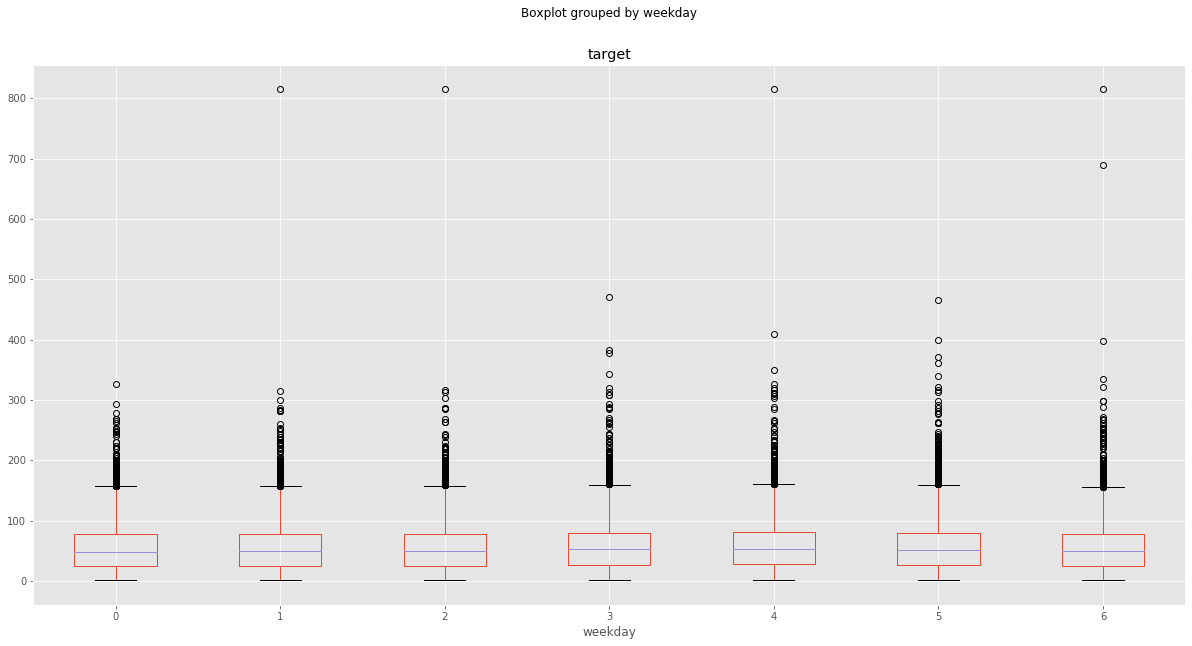

In [14]:
train_data.boxplot(figsize= (20,10), column= 'target', by= 'weekday')

plt.show()

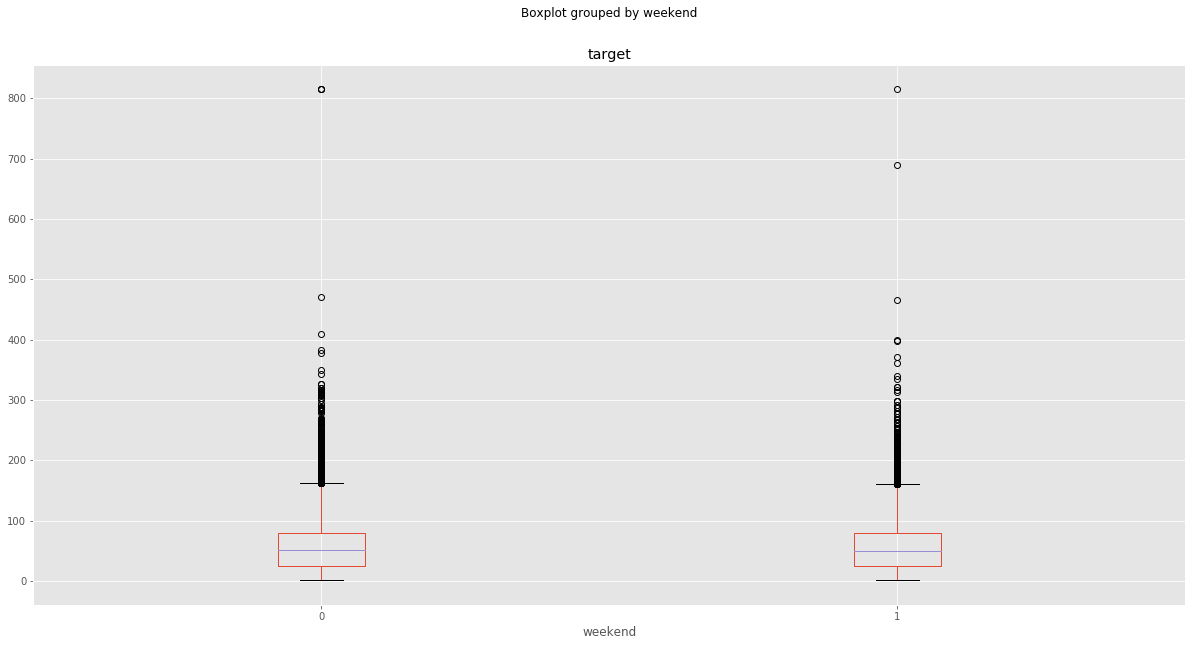

In [15]:
train_data.boxplot(figsize= (20,10), column= 'target', by= 'weekend')

plt.show()

### Target by pollutans

In [7]:
pollutants = ['NO2', 'O3', 'CO', 'HCHO', 'SO2', 'CH4']

pollutants_features = []

for pollutant in pollutants:
    
    pollutant_features = [i for i in raw_train_data_columns if pollutant in i]
    
    if [i for i in pollutant_features if 'L3_' + pollutant + '_' + pollutant + '_column_number_density' == i]:
        
        pollutants_features.extend([i for i in pollutant_features if 'L3_' + pollutant + '_' + pollutant + '_column_number_density' == i])
    
    else:
        
        pollutants_features.extend([i for i in pollutant_features if 'L3_' + pollutant + '_tropospheric_' + pollutant + '_column_number_density' == i])

pollutants_features.extend([i for i in raw_train_data_columns if 'AER_AI' in i])

pollutants_features

['L3_NO2_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_CO_CO_column_number_density',
 'L3_HCHO_tropospheric_HCHO_column_number_density',
 'L3_SO2_SO2_column_number_density',
 'L3_AER_AI_absorbing_aerosol_index',
 'L3_AER_AI_sensor_altitude',
 'L3_AER_AI_sensor_azimuth_angle',
 'L3_AER_AI_sensor_zenith_angle',
 'L3_AER_AI_solar_azimuth_angle',
 'L3_AER_AI_solar_zenith_angle']

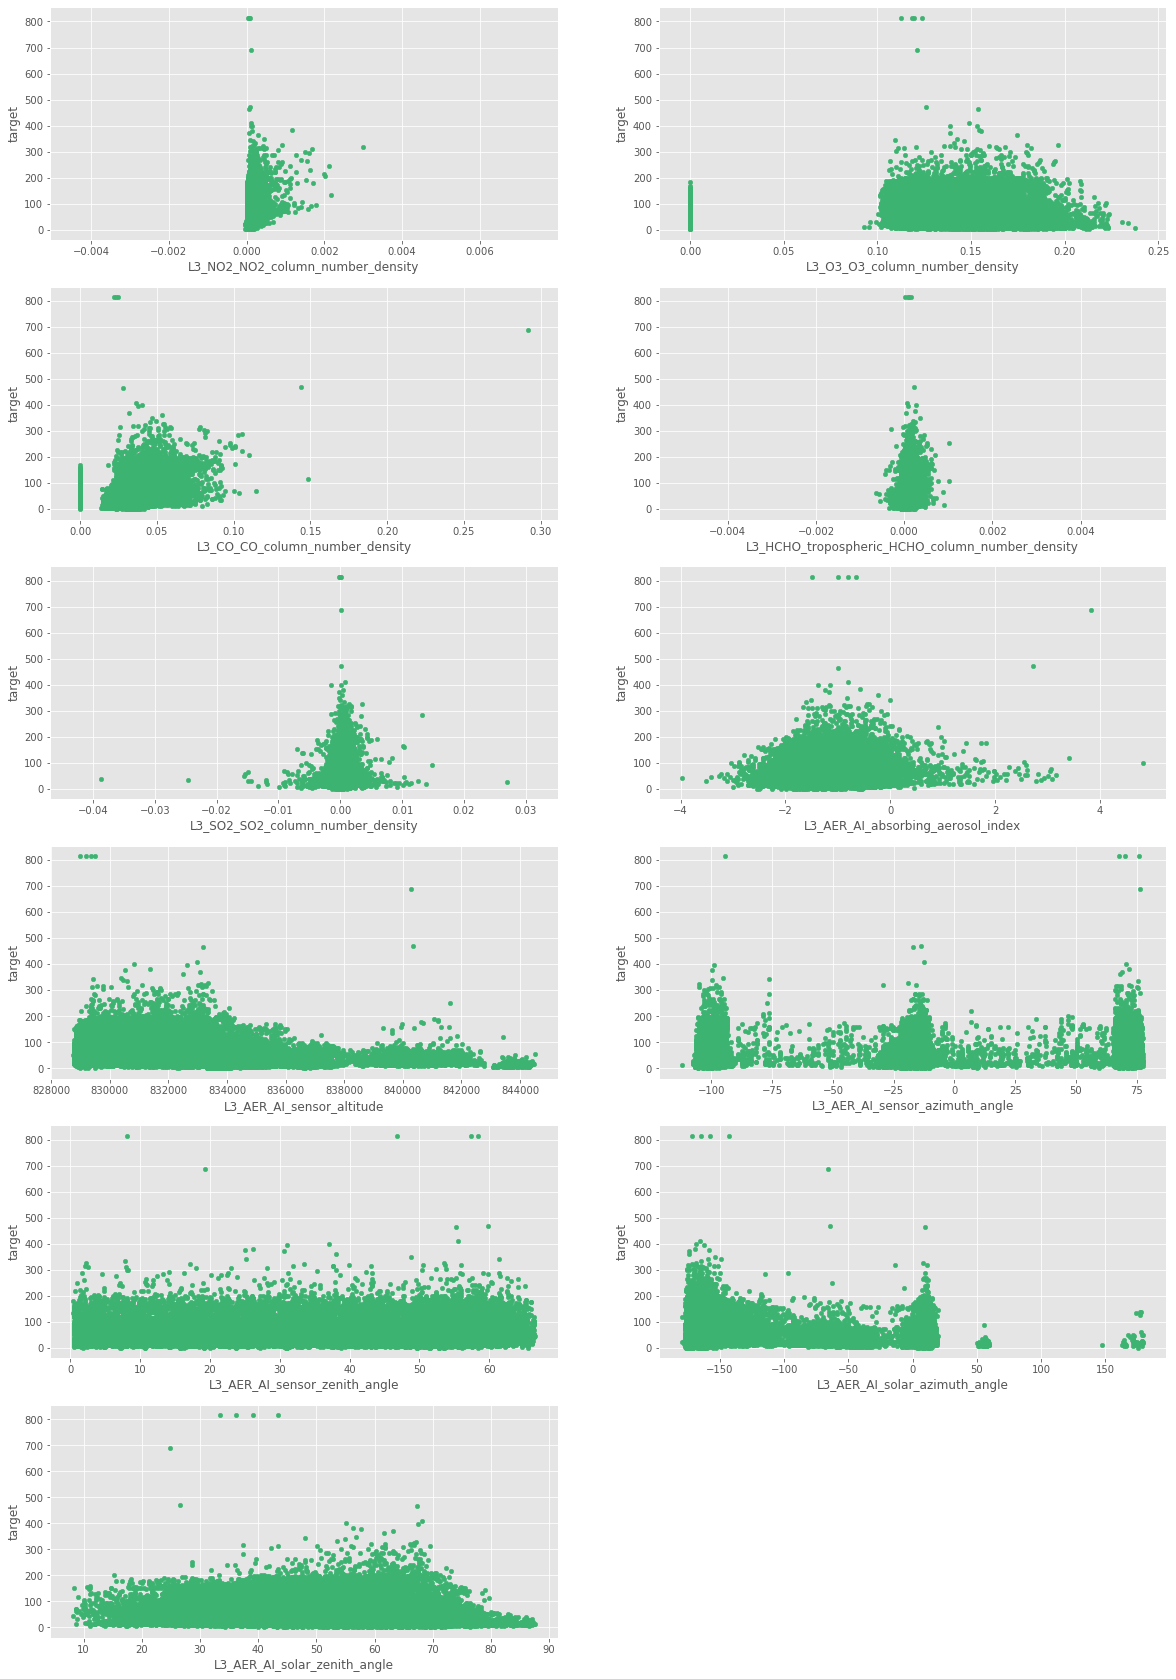

In [20]:
plt.figure(figsize= (20,30))

for i in range(1, len(pollutants_features) + 1):
    
    ax = plt.subplot(6, 2, i)
    
    train_data.plot(kind= 'scatter',
                    x= pollutants_features[i-1],
                    y= 'target',
                    color= 'mediumseagreen',
                    ax= ax)

plt.show()

*Clearly* interesting features:

* L3_SO2_SO2_column_number_density
* L3_AER_AI_absorbing_aerosol_index
* L3_AER_AI_sensor_azimuth_angle

## Preprocessing

In [8]:
from sklearn import preprocessing

In [17]:
## format cell ##

features = weather_features + pollutants_features + ['weekend', 'weekday']

train_data = train_data[features + ['target']]

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   precipitable_water_entire_atmosphere             30557 non-null  float64
 1   relative_humidity_2m_above_ground                30557 non-null  float64
 2   specific_humidity_2m_above_ground                30557 non-null  float64
 3   temperature_2m_above_ground                      30557 non-null  float64
 4   u_component_of_wind_10m_above_ground             30557 non-null  float64
 5   v_component_of_wind_10m_above_ground             30557 non-null  float64
 6   L3_CLOUD_cloud_base_height                       29035 non-null  float64
 7   L3_CLOUD_cloud_base_pressure                     29035 non-null  float64
 8   L3_CLOUD_cloud_fraction                          30183 non-null  float64
 9   L3_CLOUD_cloud_optical_depth

In [18]:
## format cell ##

## Missing values

train_data = train_data.fillna(train_data.mean()) #impute NAs with means

train_data.isnull().sum()

precipitable_water_entire_atmosphere               0
relative_humidity_2m_above_ground                  0
specific_humidity_2m_above_ground                  0
temperature_2m_above_ground                        0
u_component_of_wind_10m_above_ground               0
v_component_of_wind_10m_above_ground               0
L3_CLOUD_cloud_base_height                         0
L3_CLOUD_cloud_base_pressure                       0
L3_CLOUD_cloud_fraction                            0
L3_CLOUD_cloud_optical_depth                       0
L3_CLOUD_cloud_top_height                          0
L3_CLOUD_cloud_top_pressure                        0
L3_CLOUD_sensor_azimuth_angle                      0
L3_CLOUD_sensor_zenith_angle                       0
L3_CLOUD_solar_azimuth_angle                       0
L3_CLOUD_solar_zenith_angle                        0
L3_CLOUD_surface_albedo                            0
L3_NO2_NO2_column_number_density                   0
L3_O3_O3_column_number_density                

In [15]:
# ## format cell ##

# ## Generate polynomial and interaction features

# polynomial_features = preprocessing.PolynomialFeatures(degree= 3, include_bias= False)

# x = polynomial_features.fit_transform(train_data.loc[:, ~train_data.columns.isin(['target', 'weekday', 'weekend'])])

# train_data = pd.concat([pd.DataFrame(x, columns= polynomial_features.get_feature_names(train_data.loc[:, ~train_data.columns.isin(['target', 'weekday', 'weekend'])].columns)),
#              train_data[['target', 'weekday', 'weekend']]], axis= 1)

In [19]:
## format cell ##

## Categorical features

#train_data = pd.get_dummies(train_data, columns= ['weekday'])

train_data[['weekday', 'weekend']] = train_data[['weekday', 'weekend']].astype(str)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   precipitable_water_entire_atmosphere             30557 non-null  float64
 1   relative_humidity_2m_above_ground                30557 non-null  float64
 2   specific_humidity_2m_above_ground                30557 non-null  float64
 3   temperature_2m_above_ground                      30557 non-null  float64
 4   u_component_of_wind_10m_above_ground             30557 non-null  float64
 5   v_component_of_wind_10m_above_ground             30557 non-null  float64
 6   L3_CLOUD_cloud_base_height                       30557 non-null  float64
 7   L3_CLOUD_cloud_base_pressure                     30557 non-null  float64
 8   L3_CLOUD_cloud_fraction                          30557 non-null  float64
 9   L3_CLOUD_cloud_optical_depth

In [11]:
train_data.describe()

precipitable_water_entire_atmosphere  \
count                          30557.000000   
mean                              15.302326   
std                               10.688573   
min                                0.420044   
25%                                7.666667   
50%                               12.200000   
75%                               19.900000   
max                               72.599998   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
count                       30557.000000                       30557.000000   
mean                           70.552747                           0.006004   
std                            18.807884                           0.003787   
min                             5.128572                           0.000139   
25%                            58.600002                           0.003403   
50%                            74.099998                           0.004912   
75%                            85.450001                           0.007562   
max                           100.000000                           0.021615   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
count                 30557.000000                          30557.000000   
mean                      9.321342                              0.416886   
std                       9.343226                              2.707990   
min                     -34.647879                            -15.559646   
25%                       3.123071                             -1.097864   
50%                       8.478424                              0.222092   
75%                      16.201563                              1.772925   
max                      37.437921                             17.955124   

       v_component_of_wind_10m_above_ground  L3_CLOUD_cloud_base_height  \
count                          30557.000000                29035.000000   
mean                               0.088486                 2510.989311   
std                                2.641924                 2244.918638   
min                              -15.023647                    8.997803   
25%                               -1.415701                  771.406343   
50%                                0.012847                 1855.512628   
75%                                1.555559                 3667.166162   
max                               15.055530                14000.000000   

       L3_CLOUD_cloud_base_pressure  L3_CLOUD_cloud_fraction  \
count                  29035.000000             30183.000000   
mean                   77491.774334                 0.433513   
std                    18369.734545                 0.350953   
min                    12936.275870                 0.000000   
25%                    65459.856331                 0.112687   
50%                    81508.246961                 0.340757   
75%                    92813.052502                 0.771836   
max                   101299.000000                 1.000000   

       L3_CLOUD_cloud_optical_depth  L3_CLOUD_cloud_top_height  \
count                  29035.000000               29035.000000   
mean                      18.201564                3286.134009   
std                       23.790555                2410.281854   
min                        1.000000                  10.049448   
25%                        5.195713                1503.254367   
50%                        8.520578                2641.053220   
75%                       21.040006                4626.832633   
max                      237.121177               15000.000000   

       L3_CLOUD_cloud_top_pressure  L3_CLOUD_sensor_azimuth_angle  \
count                 29035.000000                   30183.000000   
mean                  70799.498221                     -11.556380   
std                   18595.820145                      71.499750   
min                   10956.609463                    -111.947

In [11]:
# ## format cell ##

## Normalization

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler.fit(train_data.loc[:, train_data.columns != 'target'])

#print(min_max_scaler.data_max_)

train_data.loc[:, train_data.columns != 'target'] = min_max_scaler.transform(train_data.loc[:, train_data.columns != 'target'])

train_data.head()

precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                              0.146577                           0.580485   
1                              0.196453                           0.460322   
2                              0.221390                           0.297997   
3                              0.089941                           0.170456   
4                              0.186755                           0.417106   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                           0.367893                     0.737520   
1                           0.384190                     0.793421   
2                           0.342748                     0.855632   
3                           0.175583                     0.813194   
4                           0.242636                     0.713930   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                              0.523829                              0.458665   
1                              0.563634                              0.459971   
2                              0.615411                              0.615848   
3                              0.553895                              0.536022   
4                              0.542490                              0.588254   

   L3_CLOUD_cloud_base_height  L3_CLOUD_cloud_base_pressure  \
0                    0.178829                      0.730574   
1                    0.011866                      0.977990   
2                    0.019077                      0.964011   
3                    0.026781                      0.954273   
4                    0.307732                      0.531205   

   L3_CLOUD_cloud_fraction  L3_CLOUD_cloud_optical_depth  \
0                 0.000000                      0.072851   
1                 0.059358                      0.021000   
2                 0.082247                      0.020141   
3                 0.121555                      0.022221   
4                 0.037008                      0.013576   

   L3_CLOUD_cloud_top_height  L3_CLOUD_cloud_top_pressure  \
0                   0.218552                     0.662401   
1                   0.011009                     0.978467   
2                   0.033284                     0.937708   
3                   0.032377                     0.943919   
4                   0.353866                     0.460525   

   L3_CLOUD_sensor_azimuth_angle  L3_CLOUD_sensor_zenith_angle  \
0                       0.993812                      0.581611   
1                       0.512712                      0.901923   
2                       0.035572                      0.752896   
3                       0.040145                      0.438272   
4                       0.900559                      0.005990   

   L3_CLOUD_solar_azimuth_angle  L3_CLOUD_solar_zenith_angle  \
0                      0.328522                     0.195995   
1                      0.311993                     0.283722   
2                      0.282365                     0.363465   
3                      0.294735                     0.310817   
4                      0.309436                     0.259653   

   L3_CLOUD_surface_albedo  L3_NO2_NO2_column_number_density  \
0                 0.217020                          0.040916   
1                 0.308023                          0.041638   
2                 0.299864                          0.038547   
3                 0.271271                          0.043786   
4                 0.228733                          0.039786   

   L3_O3_O3_column_number_density  L3_CO_CO_column_number_density  \
0                        0.501130                        0.072308   
1                        0.484652                        0.075520   
2                        0.487585                        0.070923   
3                        0.595649                        0.072743   
4            

## Dev

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV

In [20]:
# create train and validation data sets

x_train, x_val, y_train, y_val = train_test_split(train_data.loc[:, train_data.columns != 'target'], 
                                                  train_data[['target']], 
                                                  test_size= 0.2, 
                                                  random_state= 1)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(24445, 30)
(6112, 30)
(24445, 1)
(6112, 1)


#### Linear regression

In [56]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(x_train, y_train)

coeffs = pd.DataFrame(np.transpose(lr_model.coef_), 
                      index= x_train.columns, columns= ['Coefficient'])

coeffs.loc[abs(coeffs).sort_values(by= 'Coefficient', ascending= False).index, :]

Coefficient
weekend                                         -6.512141e+14
weekday_6                                        5.513315e+14
weekday_5                                        5.513315e+14
weekday_0                                       -9.988263e+13
weekday_1                                       -9.988263e+13
weekday_2                                       -9.988263e+13
weekday_3                                       -9.988263e+13
weekday_4                                       -9.988263e+13
L3_CLOUD_cloud_top_height                        1.480888e+03
L3_CLOUD_cloud_base_height                      -1.459740e+03
L3_CLOUD_cloud_top_pressure                      9.396437e+02
L3_CLOUD_cloud_base_pressure                    -8.908272e+02
L3_NO2_NO2_column_number_density                 3.183520e+02
L3_CO_CO_column_number_density                   2.278807e+02
L3_HCHO_tropospheric_HCHO_column_number_density  2.209729e+02
L3_SO2_SO2_column_number_density                 8.993226e+01
L3_AER_AI_absorbing_aerosol_index                8.539876e+01
L3_AER_AI_solar_zenith_angle                    -8.415250e+01
temperature_2m_above_ground                     -8.165622e+01
L3_CLOUD_solar_zenith_angle                      5.682821e+01
L3_O3_O3_column_number_density                  -5.444472e+01
L3_CLOUD_cloud_optical_depth                    -4.147971e+01
L3_AER_AI_sensor_altitude                       -4.039791e+01
u_component_of_wind_10m_above_ground            -3.496192e+01
v_component_of_wind_10m_above_ground             2.507445e+01
L3_CLOUD_sensor_azimuth_angle                   -1.486904e+01
L3_AER_AI_sensor_azimuth_angle                   1.395703e+01
L3_AER_AI_sensor_zenith_angle                   -1.325625e+01
specific_humidity_2m_above_ground               -1.216736e+01
L3_CLOUD_sensor_zenith_angle                     1.183640e+01
precipitable_water_entire_atmosphere            -1.164086e+01
L3_AER_AI_solar_azimuth_angle                   -1.143611e+01
relative_humidity_2m_above_ground                6.024319e+00
L3_CLOUD_solar_azimuth_angle                    -5.298670e+00
L3_CLOUD_surface_albedo                         -1.701947e+00
L3_CLOUD_cloud_fraction                         -1.174215e+00

In [ ]:
# evaluation

print('RMSE on training data:', mean_squared_error(y_train, lr_model.predict(x_train), squared= False)) #squared= False returns RMSE instead of MSE

print('RMSE on validation data:', mean_squared_error(y_val, lr_model.predict(x_val), squared= False))

#### Decision tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
train_val_indices = [0 if i in x_val.index else -1 for i in train_data.index]

ps = PredefinedSplit(train_val_indices)

for train_index, val_index in ps.split():
    
    print("TRAIN:", train_index, "VAL:", val_index)
    print("TRAIN size:", len(train_index), "VAL size:", len(val_index))

TRAIN: [    0     1     3 ... 30553 30554 30555] VAL: [    2    11    22 ... 30548 30549 30556]
TRAIN size: 24445 VAL size: 6112


In [30]:
dt = DecisionTreeRegressor(criterion= 'mse', random_state= 0)

param_grid = {'max_depth': range(3, 16, 3),
              'min_samples_split': range(500, 3001, 500),
              'min_samples_leaf': range(50, 451, 100)}

dt_gs = GridSearchCV(dt, 
                     param_grid,
                     scoring= 'neg_root_mean_squared_error',
                     cv= ps,
                     return_train_score= True,
                     refit= True, #on all data
                     verbose= 3)

dt_gs.fit(train_data.loc[:, train_data.columns != 'target'], train_data[['target']])

Fitting 1 folds for each of 150 candidates, totalling 150 fits
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=500 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=500, score=(train=-40.788, test=-39.412), total=   0.4s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=1000 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=1000, score=(train=-40.788, test=-39.412), total=   0.4s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=1500 ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=1500, score=(train=-41.245, test=-39.691), total=   0.4s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=2000 ........
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=2000, score=(train=-41.245, test=-39.691), total=   0.4s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=2500 ........
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=2500, score=(train=-41.245, test=-39.691), total=   0.4s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=3000 ........
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=3000, score=(train=-41.675, test=-40.178), total=   0.4s
[CV] max_depth=3, min_samples_leaf=150, min_samples_split=500 ........
[CV]  max_depth=3, min_samples_leaf=150, min_samples_split=500, score=(train=-40.788, test=-39.412), total=   0.4s
[CV] max_depth=3, min_samples_leaf=150, min_samples_split=1000 .......
[CV]  max_depth=3, min_samples_leaf=150, min_samples_split=1000, score

[CV]  max_depth=6, min_samples_leaf=250, min_samples_split=2500, score=(train=-39.923, test=-38.436), total=   0.5s
[CV] max_depth=6, min_samples_leaf=250, min_samples_split=3000 .......
[CV]  max_depth=6, min_samples_leaf=250, min_samples_split=3000, score=(train=-40.642, test=-39.150), total=   0.5s
[CV] max_depth=6, min_samples_leaf=350, min_samples_split=500 ........
[CV]  max_depth=6, min_samples_leaf=350, min_samples_split=500, score=(train=-38.347, test=-37.435), total=   0.6s
[CV] max_depth=6, min_samples_leaf=350, min_samples_split=1000 .......
[CV]  max_depth=6, min_samples_leaf=350, min_samples_split=1000, score=(train=-38.563, test=-37.618), total=   0.5s
[CV] max_depth=6, min_samples_leaf=350, min_samples_split=1500 .......
[CV]  max_depth=6, min_samples_leaf=350, min_samples_split=1500, score=(train=-39.515, test=-38.175), total=   0.5s
[CV] max_depth=6, min_samples_leaf=350, min_samples_split=2000 .......
[CV]  max_depth=6, min_samples_leaf=350, min_samples_split=2000, s

[CV]  max_depth=12, min_samples_leaf=50, min_samples_split=500, score=(train=-36.087, test=-35.693), total=   0.9s
[CV] max_depth=12, min_samples_leaf=50, min_samples_split=1000 .......
[CV]  max_depth=12, min_samples_leaf=50, min_samples_split=1000, score=(train=-37.214, test=-36.520), total=   0.8s
[CV] max_depth=12, min_samples_leaf=50, min_samples_split=1500 .......
[CV]  max_depth=12, min_samples_leaf=50, min_samples_split=1500, score=(train=-38.857, test=-37.468), total=   0.7s
[CV] max_depth=12, min_samples_leaf=50, min_samples_split=2000 .......
[CV]  max_depth=12, min_samples_leaf=50, min_samples_split=2000, score=(train=-39.135, test=-37.732), total=   0.6s
[CV] max_depth=12, min_samples_leaf=50, min_samples_split=2500 .......
[CV]  max_depth=12, min_samples_leaf=50, min_samples_split=2500, score=(train=-39.441, test=-37.958), total=   0.6s
[CV] max_depth=12, min_samples_leaf=50, min_samples_split=3000 .......
[CV]  max_depth=12, min_samples_leaf=50, min_samples_split=3000, s

[CV]  max_depth=15, min_samples_leaf=250, min_samples_split=1500, score=(train=-38.914, test=-37.565), total=   0.6s
[CV] max_depth=15, min_samples_leaf=250, min_samples_split=2000 ......
[CV]  max_depth=15, min_samples_leaf=250, min_samples_split=2000, score=(train=-39.135, test=-37.732), total=   0.6s
[CV] max_depth=15, min_samples_leaf=250, min_samples_split=2500 ......
[CV]  max_depth=15, min_samples_leaf=250, min_samples_split=2500, score=(train=-39.441, test=-37.958), total=   0.6s
[CV] max_depth=15, min_samples_leaf=250, min_samples_split=3000 ......
[CV]  max_depth=15, min_samples_leaf=250, min_samples_split=3000, score=(train=-40.209, test=-38.729), total=   0.5s
[CV] max_depth=15, min_samples_leaf=350, min_samples_split=500 .......
[CV]  max_depth=15, min_samples_leaf=350, min_samples_split=500, score=(train=-37.242, test=-36.653), total=   0.7s
[CV] max_depth=15, min_samples_leaf=350, min_samples_split=1000 ......
[CV]  max_depth=15, min_samples_leaf=350, min_samples_split=1

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.6min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': range(3, 16, 3),
                         'min_samples_leaf': range(50, 451, 100),
                         'min_samples_split': range(500, 3001, 500)},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [31]:
pd.DataFrame(dt_gs.cv_results_).sort_values(by= 'rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
126       0.793055           0.0         0.018189             0.0   
96        0.889160           0.0         0.019400             0.0   
120       0.809701           0.0         0.017476             0.0   
90        0.841728           0.0         0.024153             0.0   
132       0.891866           0.0         0.023927             0.0   
..             ...           ...              ...             ...   
11        0.352405           0.0         0.018947             0.0   
5         0.336225           0.0         0.017179             0.0   
23        0.330633           0.0         0.017467             0.0   
29        0.338788           0.0         0.018437             0.0   
17        0.333287           0.0         0.016923             0.0   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
126              15                    150                     500   
96               12                    150                     500   
120              15                     50                     500   
90               12                     50                     500   
132              15                    250                     500   
..              ...                    ...                     ...   
11                3                    150                    3000   
5                 3                     50                    3000   
23                3                    350                    3000   
29                3                    450                    3000   
17                3                    250                    3000   

                                                params  split0_test_score  \
126  {'max_depth': 15, 'min_samples_leaf': 150, 'mi...         -35.589216   
96   {'max_depth': 12, 'min_samples_leaf': 150, 'mi...         -35.615448   
120  {'max_depth': 15, 'min_samples_leaf': 50, 'min...         -35.646272   
90   {'max_depth': 12, 'min_samples_leaf': 50, 'min...         -35.692708   
132  {'max_depth': 15, 'min_samples_leaf': 250, 'mi...         -35.885706   
..                                                 ...                ...   
11   {'max_depth': 3, 'min_samples_leaf': 150, 'min...         -40.178197   
5    {'max_depth': 3, 'min_samples_leaf': 50, 'min_...         -40.178197   
23   {'max_depth': 3, 'min_samples_leaf': 350, 'min...         -40.178197   
29   {'max_depth': 3, 'min_samples_leaf': 450, 'min...         -40.178197   
17   {'max_depth': 3, 'min_samples_leaf': 250, 'min...         -40.178197   

     mean_test_score  std_test_score  rank_test_score  split0_train_score  \
126       -35.589216             0.0                1          -36.336535   
96        -35.615448             0.0                2          -36.374172   
120       -35.646272             0.0                3          -36.038667   
90        -35.692708             0.0                4          -36.086793   
132       -35.885706             0.0                5          -36.714679   
..               ...             ...              ...                 ...   
11        -40.178197             0.0              146          -41.674681   
5         -40.178197             0.0              146          -41.674681   
23        -40.178197             0.0              146          -41.674681   
29        -40.178197             0.0              146          -41.674681   
17        -40.178197             0.0              146          -41.674681   

     mean_train_score  std_train_score  
126        -36.336535              0.0  
96         -36.374172              0.0  
120        -36.038667              0.0  
90         -36.086793              0.0  
132        -36.714679              0.0  
..                ...              ...  
11         -41.674681              0.0  
5          -41.674681              0.0  
23         -41.674681              0.0  
29         -41.674681              0.0  
17         -41.674681             

In [32]:
print(dt_gs.best_score_)
print(dt_gs.best_params_)

-35.58921632046087
{'max_depth': 15, 'min_samples_leaf': 150, 'min_samples_split': 500}


In [33]:
print(dt_gs.best_estimator_.get_depth())
print(dt_gs.best_estimator_.get_n_leaves())

14
106


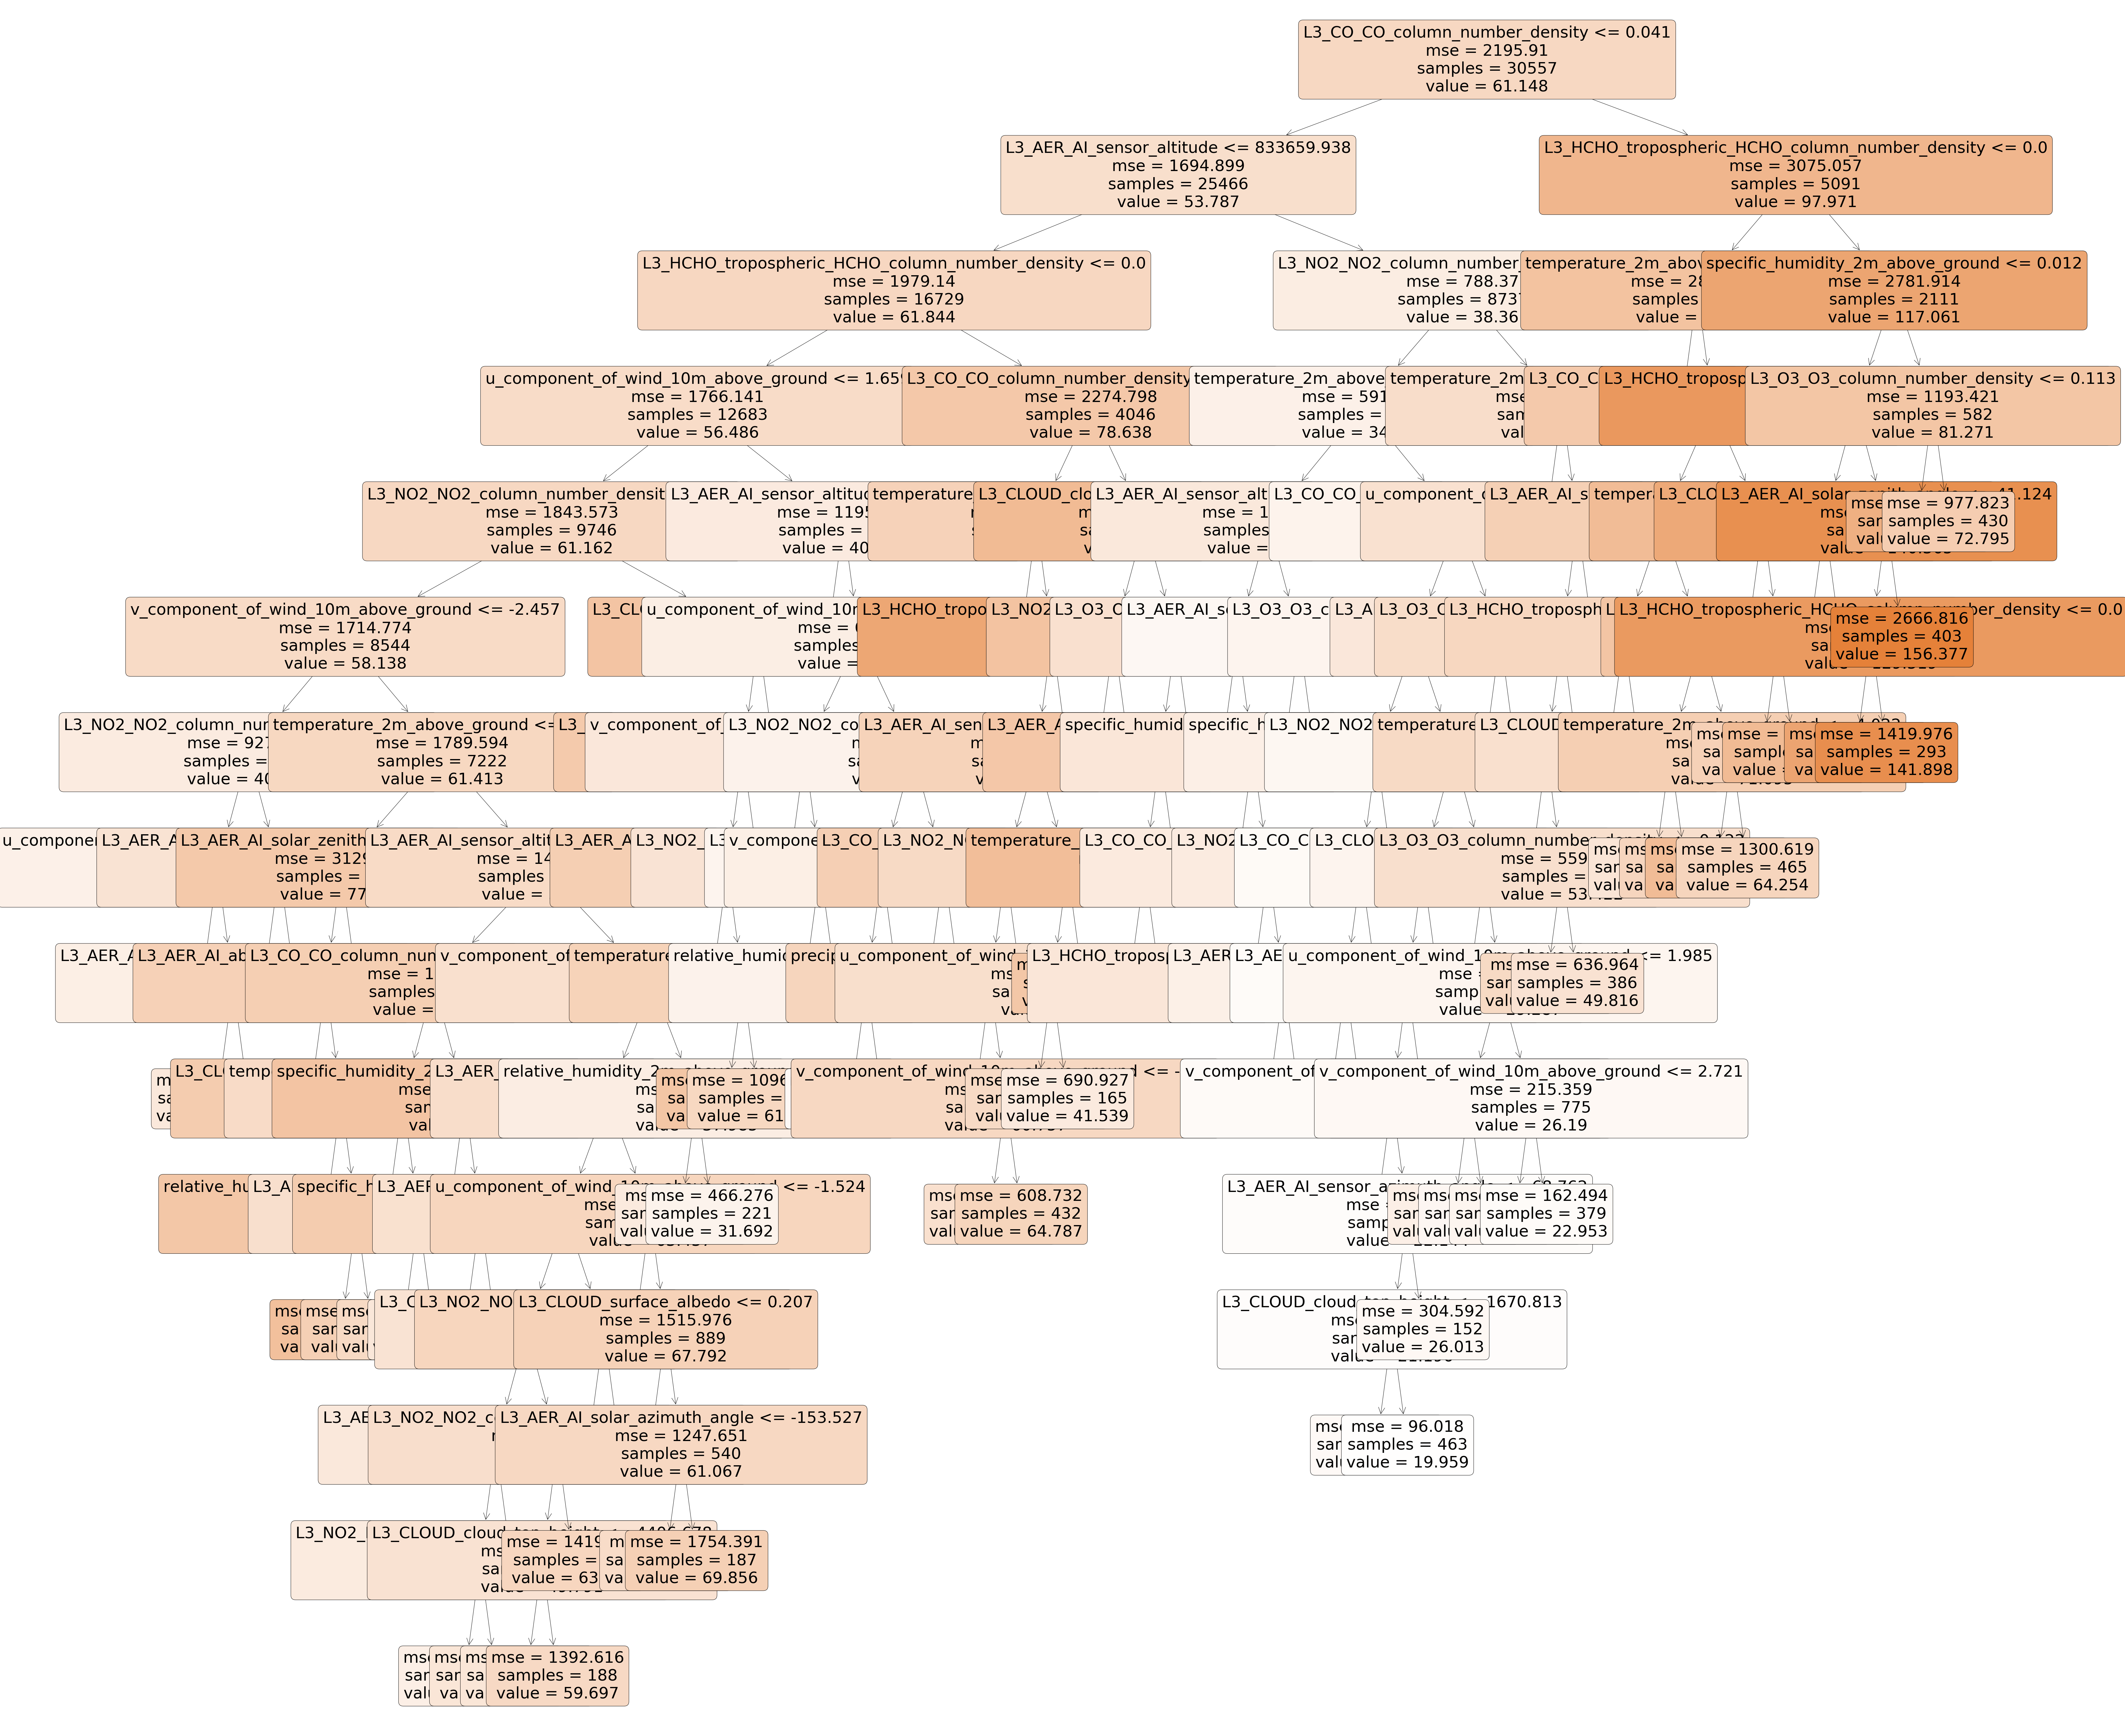

In [23]:
from sklearn import tree

fig = plt.figure(figsize= (100,100))

_ = tree.plot_tree(dt_gs.best_estimator_,
                   feature_names= x_train.columns,
                   filled= True,
                   rounded= True,
                   fontsize= 50
                  )

#### Kernel regression

In [14]:
class GKR:
    
    def __init__(self, x_train, y_train, b):
        
        self.x_train = x_train
        self.y_train = y_train
        self.b = b
    
    '''calculates the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)
    
    '''calculates weights/similarities'''
    def get_weights(self, x_predict):
        
        kernels = self.gaussian_kernel(np.linalg.norm( 
                                         x_predict - self.x_train, axis= 1) / self.b) 
          
        weights = (kernels / kernels.sum()) * self.x_train.shape[0] 
  
        return weights
        
    '''calculates predictions'''
    def predict(self, x_predict):
        
        return np.dot(self.get_weights(x_predict), self.y_train.reshape(-1)) / self.x_train.shape[0] 

In [28]:
best_b = 0
best_RMSE = 1000

for b in [0.1, 0.13, 0.14, 0.15, 0.16, 0.2]:
    
    print('Trying b= {} ...'.format(b))
    
    gkr_model = GKR(x_train.values, y_train.values, b)
    
    RMSE = mean_squared_error(y_val,
                              [gkr_model.predict(i) for i in x_val.values],
                              squared= False)
    
    print('RMSE on validation data:', RMSE)
    
    if RMSE < best_RMSE:
        
        best_b = b
        
        best_RMSE = RMSE

Trying b= 0.1 ...
RMSE on validation data: 40.939139702492426
Trying b= 0.13 ...
RMSE on validation data: 39.10613245952649
Trying b= 0.14 ...
RMSE on validation data: 38.88939187217741
Trying b= 0.15 ...
RMSE on validation data: 38.83662004824592
Trying b= 0.16 ...
RMSE on validation data: 38.913577209272404
Trying b= 0.2 ...
RMSE on validation data: 39.875976394710264


In [29]:
print('We get the best RMSE on validation data of {} using b= {}'.format(best_RMSE, best_b))

We get the best RMSE on validation data of 38.83662004824592 using b= 0.15


In [30]:
gkr_model = GKR(x_train.values, y_train.values, best_b)


#### Random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [21]:
max_depths = [int(x) for x in np.linspace(start= 10, stop= 30, num= 6)]

max_depths.append(None)

param_grid = {'n_estimators': [int(x) for x in np.linspace(start= 10, stop= 300, num= 10)],
              'max_features': [x for x in np.arange(0.1, 1.01, 0.1)],
              'max_depth': max_depths,
              'min_samples_split': [20, 50, 100, 500, 1000],
              'min_samples_leaf': [20, 50, 100, 500, 1000]
               }

print(param_grid)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0], 'max_depth': [10, 14, 18, 22, 26, 30, None], 'min_samples_split': [20, 50, 100, 500, 1000], 'min_samples_leaf': [20, 50, 100, 500, 1000]}


In [22]:
rf = RandomForestRegressor(bootstrap= True, random_state= 0)

rf_random = RandomizedSearchCV(estimator= rf, 
                               param_distributions= param_grid, 
                               n_iter= 100, 
                               cv= 3,
                               verbose= 3,
                               scoring= 'neg_root_mean_squared_error',
                               return_train_score= True)

rf_random.fit(train_data.loc[:, train_data.columns != 'target'], train_data[['target']])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=1000, max_features=0.5, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=1000, max_features=0.5, max_depth=10, score=(train=-39.243, test=-39.195), total=  19.7s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=1000, max_features=0.5, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.9s remaining:    0.0s
/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=1000, max_features=0.5, max_depth=10, score=(train=-39.974, test=-38.813), total=  16.9s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=1000, max_features=0.5, max_depth=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.9s remaining:    0.0s
/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=1000, max_features=0.5, max_depth=10, score=(train=-38.255, test=-43.497), total=  18.4s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=14, score=(train=-33.556, test=-36.369), total=  21.0s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=14, score=(train=-34.739, test=-34.567), total=  20.7s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=14, score=(train=-32.468, test=-40.395), total=  22.3s
[CV] n_estimators=10, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=26, score=(train=-38.584, test=-39.081), total=   0.4s
[CV] n_estimators=10, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=26, score=(train=-39.586, test=-38.259), total=   0.4s
[CV] n_estimators=10, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=26, score=(train=-36.990, test=-43.334), total=   0.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=26, score=(train=-39.689, test=-39.758), total=  45.7s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=26, score=(train=-40.184, test=-39.596), total=  44.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=26, score=(train=-38.784, test=-43.734), total=  48.6s
[CV] n_estimators=203, min_samples_split=500, min_samples_leaf=100, max_features=0.1, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=500, min_samples_leaf=100, max_features=0.1, max_depth=22, score=(train=-37.022, test=-38.063), total=   7.2s
[CV] n_estimators=203, min_samples_split=500, min_samples_leaf=100, max_features=0.1, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=500, min_samples_leaf=100, max_features=0.1, max_depth=22, score=(train=-38.131, test=-37.147), total=   7.3s
[CV] n_estimators=203, min_samples_split=500, min_samples_leaf=100, max_features=0.1, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=500, min_samples_leaf=100, max_features=0.1, max_depth=22, score=(train=-35.747, test=-42.453), total=   7.7s
[CV] n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=1.0, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=1.0, max_depth=26, score=(train=-34.953, test=-37.391), total=  52.0s
[CV] n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=1.0, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=1.0, max_depth=26, score=(train=-35.987, test=-35.639), total=  50.3s
[CV] n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=1.0, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=1.0, max_depth=26, score=(train=-33.733, test=-41.239), total=  56.3s
[CV] n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.8, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.8, max_depth=14, score=(train=-39.468, test=-39.559), total=  18.9s
[CV] n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.8, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.8, max_depth=14, score=(train=-40.128, test=-39.343), total=  18.4s
[CV] n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.8, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.8, max_depth=14, score=(train=-38.592, test=-43.651), total=  19.9s
[CV] n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=14, score=(train=-30.967, test=-35.746), total=  54.4s
[CV] n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=14, score=(train=-32.090, test=-33.365), total=  51.7s
[CV] n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=14, score=(train=-29.979, test=-39.392), total=  56.1s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=30, score=(train=-38.249, test=-38.667), total=   5.5s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=30, score=(train=-39.151, test=-37.982), total=   5.6s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=30, score=(train=-36.894, test=-43.171), total=   5.9s
[CV] n_estimators=235, min_samples_split=100, min_samples_leaf=100, max_features=0.1, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=100, min_samples_leaf=100, max_features=0.1, max_depth=26, score=(train=-35.504, test=-37.376), total=   9.4s
[CV] n_estimators=235, min_samples_split=100, min_samples_leaf=100, max_features=0.1, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=100, min_samples_leaf=100, max_features=0.1, max_depth=26, score=(train=-36.683, test=-36.186), total=   9.4s
[CV] n_estimators=235, min_samples_split=100, min_samples_leaf=100, max_features=0.1, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=100, min_samples_leaf=100, max_features=0.1, max_depth=26, score=(train=-34.329, test=-41.601), total=   9.9s
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=18, score=(train=-34.136, test=-36.704), total=   1.1s
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=18, score=(train=-35.349, test=-34.993), total=   1.1s
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=100, max_features=0.30000000000000004, max_depth=18, score=(train=-33.114, test=-40.757), total=   1.2s
[CV] n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.4, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.4, max_depth=18, score=(train=-39.381, test=-39.199), total=  21.1s
[CV] n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.4, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.4, max_depth=18, score=(train=-40.110, test=-38.855), total=  20.4s
[CV] n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.4, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.4, max_depth=18, score=(train=-38.241, test=-43.460), total=  22.0s
[CV] n_estimators=138, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26, score=(train=-34.147, test=-36.644), total=   9.8s
[CV] n_estimators=138, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26, score=(train=-35.392, test=-35.148), total=   9.8s
[CV] n_estimators=138, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26, score=(train=-32.998, test=-40.667), total=  10.4s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=18, score=(train=-36.529, test=-37.700), total=   4.5s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=18, score=(train=-37.640, test=-36.549), total=   4.4s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=18, score=(train=-35.132, test=-42.247), total=   4.9s
[CV] n_estimators=42, min_samples_split=100, min_samples_leaf=500, max_features=0.7000000000000001, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=100, min_samples_leaf=500, max_features=0.7000000000000001, max_depth=None, score=(train=-37.635, test=-38.377), total=   6.6s
[CV] n_estimators=42, min_samples_split=100, min_samples_leaf=500, max_features=0.7000000000000001, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=100, min_samples_leaf=500, max_features=0.7000000000000001, max_depth=None, score=(train=-38.423, test=-37.582), total=   6.3s
[CV] n_estimators=42, min_samples_split=100, min_samples_leaf=500, max_features=0.7000000000000001, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=100, min_samples_leaf=500, max_features=0.7000000000000001, max_depth=None, score=(train=-36.570, test=-42.011), total=   6.8s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=50, max_features=0.8, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=50, max_features=0.8, max_depth=10, score=(train=-32.379, test=-36.454), total=   2.8s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=50, max_features=0.8, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=50, max_features=0.8, max_depth=10, score=(train=-32.969, test=-34.003), total=   2.7s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=50, max_features=0.8, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=50, max_features=0.8, max_depth=10, score=(train=-30.974, test=-40.542), total=   2.9s
[CV] n_estimators=74, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26, score=(train=-34.125, test=-36.615), total=   5.4s
[CV] n_estimators=74, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26, score=(train=-35.347, test=-35.152), total=   5.3s
[CV] n_estimators=74, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=100, min_samples_leaf=100, max_features=0.2, max_depth=26, score=(train=-32.957, test=-40.634), total=   5.7s
[CV] n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=None, score=(train=-41.186, test=-40.337), total=   6.3s
[CV] n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=None, score=(train=-41.713, test=-39.871), total=   6.4s
[CV] n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=None, score=(train=-39.524, test=-45.045), total=   6.6s
[CV] n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.9, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.9, max_depth=18, score=(train=-37.116, test=-37.974), total=  47.4s
[CV] n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.9, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.9, max_depth=18, score=(train=-37.733, test=-37.251), total=  46.2s
[CV] n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.9, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.9, max_depth=18, score=(train=-35.283, test=-42.426), total=  49.7s
[CV] n_estimators=171, min_samples_split=100, min_samples_leaf=1000, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=100, min_samples_leaf=1000, max_features=0.4, max_depth=10, score=(train=-39.378, test=-39.163), total=  12.0s
[CV] n_estimators=171, min_samples_split=100, min_samples_leaf=1000, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=100, min_samples_leaf=1000, max_features=0.4, max_depth=10, score=(train=-40.089, test=-38.838), total=  11.6s
[CV] n_estimators=171, min_samples_split=100, min_samples_leaf=1000, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=100, min_samples_leaf=1000, max_features=0.4, max_depth=10, score=(train=-38.223, test=-43.469), total=  12.7s
[CV] n_estimators=138, min_samples_split=1000, min_samples_leaf=1000, max_features=0.30000000000000004, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=1000, min_samples_leaf=1000, max_features=0.30000000000000004, max_depth=None, score=(train=-39.489, test=-39.184), total=   7.5s
[CV] n_estimators=138, min_samples_split=1000, min_samples_leaf=1000, max_features=0.30000000000000004, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=1000, min_samples_leaf=1000, max_features=0.30000000000000004, max_depth=None, score=(train=-40.223, test=-38.722), total=   7.2s
[CV] n_estimators=138, min_samples_split=1000, min_samples_leaf=1000, max_features=0.30000000000000004, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=1000, min_samples_leaf=1000, max_features=0.30000000000000004, max_depth=None, score=(train=-38.320, test=-43.445), total=   7.7s
[CV] n_estimators=203, min_samples_split=500, min_samples_leaf=500, max_features=0.1, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=500, min_samples_leaf=500, max_features=0.1, max_depth=None, score=(train=-39.555, test=-39.345), total=   5.4s
[CV] n_estimators=203, min_samples_split=500, min_samples_leaf=500, max_features=0.1, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=500, min_samples_leaf=500, max_features=0.1, max_depth=None, score=(train=-40.367, test=-38.770), total=   5.5s
[CV] n_estimators=203, min_samples_split=500, min_samples_leaf=500, max_features=0.1, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=500, min_samples_leaf=500, max_features=0.1, max_depth=None, score=(train=-38.118, test=-43.984), total=   5.7s
[CV] n_estimators=138, min_samples_split=100, min_samples_leaf=50, max_features=1.0, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=100, min_samples_leaf=50, max_features=1.0, max_depth=None, score=(train=-30.941, test=-36.059), total=  51.3s
[CV] n_estimators=138, min_samples_split=100, min_samples_leaf=50, max_features=1.0, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=100, min_samples_leaf=50, max_features=1.0, max_depth=None, score=(train=-31.946, test=-33.729), total=  50.1s
[CV] n_estimators=138, min_samples_split=100, min_samples_leaf=50, max_features=1.0, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=100, min_samples_leaf=50, max_features=1.0, max_depth=None, score=(train=-29.958, test=-39.344), total=  53.7s
[CV] n_estimators=138, min_samples_split=50, min_samples_leaf=1000, max_features=0.1, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=50, min_samples_leaf=1000, max_features=0.1, max_depth=22, score=(train=-41.142, test=-40.286), total=   2.9s
[CV] n_estimators=138, min_samples_split=50, min_samples_leaf=1000, max_features=0.1, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=50, min_samples_leaf=1000, max_features=0.1, max_depth=22, score=(train=-41.659, test=-39.853), total=   2.9s
[CV] n_estimators=138, min_samples_split=50, min_samples_leaf=1000, max_features=0.1, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=50, min_samples_leaf=1000, max_features=0.1, max_depth=22, score=(train=-39.457, test=-44.925), total=   3.0s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=50, max_features=0.8, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=50, max_features=0.8, max_depth=14, score=(train=-36.883, test=-37.830), total=  35.3s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=50, max_features=0.8, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=50, max_features=0.8, max_depth=14, score=(train=-37.727, test=-37.099), total=  35.4s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=50, max_features=0.8, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=50, max_features=0.8, max_depth=14, score=(train=-35.113, test=-42.381), total=  37.3s
[CV] n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=0.1, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=0.1, max_depth=14, score=(train=-36.719, test=-37.964), total=   6.3s
[CV] n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=0.1, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=0.1, max_depth=14, score=(train=-37.860, test=-36.955), total=   6.3s
[CV] n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=0.1, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=500, min_samples_leaf=50, max_features=0.1, max_depth=14, score=(train=-35.557, test=-42.321), total=   7.1s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.8, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.8, max_depth=None, score=(train=-39.452, test=-39.529), total=  40.9s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.8, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.8, max_depth=None, score=(train=-40.127, test=-39.385), total=  40.0s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.8, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1000, max_features=0.8, max_depth=None, score=(train=-38.555, test=-43.630), total=  43.2s
[CV] n_estimators=267, min_samples_split=20, min_samples_leaf=100, max_features=0.2, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=20, min_samples_leaf=100, max_features=0.2, max_depth=30, score=(train=-34.078, test=-36.601), total=  19.8s
[CV] n_estimators=267, min_samples_split=20, min_samples_leaf=100, max_features=0.2, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=20, min_samples_leaf=100, max_features=0.2, max_depth=30, score=(train=-35.331, test=-35.089), total=  19.1s
[CV] n_estimators=267, min_samples_split=20, min_samples_leaf=100, max_features=0.2, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=20, min_samples_leaf=100, max_features=0.2, max_depth=30, score=(train=-32.971, test=-40.660), total=  20.4s
[CV] n_estimators=235, min_samples_split=50, min_samples_leaf=500, max_features=0.6, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=50, min_samples_leaf=500, max_features=0.6, max_depth=26, score=(train=-37.646, test=-38.341), total=  31.2s
[CV] n_estimators=235, min_samples_split=50, min_samples_leaf=500, max_features=0.6, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=50, min_samples_leaf=500, max_features=0.6, max_depth=26, score=(train=-38.468, test=-37.493), total=  30.2s
[CV] n_estimators=235, min_samples_split=50, min_samples_leaf=500, max_features=0.6, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=50, min_samples_leaf=500, max_features=0.6, max_depth=26, score=(train=-36.447, test=-42.068), total=  33.0s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=500, max_features=1.0, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=500, max_features=1.0, max_depth=18, score=(train=-38.410, test=-38.856), total= 1.1min
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=500, max_features=1.0, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=500, max_features=1.0, max_depth=18, score=(train=-38.736, test=-38.003), total= 1.1min
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=500, max_features=1.0, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=500, max_features=1.0, max_depth=18, score=(train=-37.121, test=-42.065), total= 1.1min
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=26, score=(train=-38.107, test=-38.736), total=   2.0s
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=26, score=(train=-38.752, test=-37.946), total=   2.0s
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=26, score=(train=-36.868, test=-42.107), total=   2.1s
[CV] n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=26, score=(train=-39.996, test=-39.441), total=  10.0s
[CV] n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=26, score=(train=-40.636, test=-39.003), total=   9.8s
[CV] n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=26, score=(train=-38.576, test=-43.902), total=  10.5s
[CV] n_estimators=106, min_samples_split=20, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=20, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=30, score=(train=-26.702, test=-35.222), total=  32.5s
[CV] n_estimators=106, min_samples_split=20, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=20, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=30, score=(train=-28.288, test=-32.646), total=  31.3s
[CV] n_estimators=106, min_samples_split=20, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=20, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=30, score=(train=-26.305, test=-38.288), total=  33.6s
[CV] n_estimators=74, min_samples_split=1000, min_samples_leaf=20, max_features=1.0, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=1000, min_samples_leaf=20, max_features=1.0, max_depth=None, score=(train=-37.392, test=-38.137), total=  18.9s
[CV] n_estimators=74, min_samples_split=1000, min_samples_leaf=20, max_features=1.0, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=1000, min_samples_leaf=20, max_features=1.0, max_depth=None, score=(train=-37.906, test=-37.452), total=  18.2s
[CV] n_estimators=74, min_samples_split=1000, min_samples_leaf=20, max_features=1.0, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=1000, min_samples_leaf=20, max_features=1.0, max_depth=None, score=(train=-35.537, test=-42.573), total=  20.0s
[CV] n_estimators=267, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=30, score=(train=-41.191, test=-40.335), total=   5.5s
[CV] n_estimators=267, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=30, score=(train=-41.731, test=-39.887), total=   5.5s
[CV] n_estimators=267, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=500, min_samples_leaf=1000, max_features=0.1, max_depth=30, score=(train=-39.523, test=-45.066), total=   5.7s
[CV] n_estimators=171, min_samples_split=20, min_samples_leaf=50, max_features=0.6, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=20, min_samples_leaf=50, max_features=0.6, max_depth=30, score=(train=-30.766, test=-35.699), total=  39.7s
[CV] n_estimators=171, min_samples_split=20, min_samples_leaf=50, max_features=0.6, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=20, min_samples_leaf=50, max_features=0.6, max_depth=30, score=(train=-32.025, test=-33.352), total=  38.0s
[CV] n_estimators=171, min_samples_split=20, min_samples_leaf=50, max_features=0.6, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=20, min_samples_leaf=50, max_features=0.6, max_depth=30, score=(train=-29.874, test=-39.312), total=  40.5s
[CV] n_estimators=106, min_samples_split=20, min_samples_leaf=1000, max_features=1.0, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=20, min_samples_leaf=1000, max_features=1.0, max_depth=18, score=(train=-39.914, test=-40.022), total=  17.9s
[CV] n_estimators=106, min_samples_split=20, min_samples_leaf=1000, max_features=1.0, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=20, min_samples_leaf=1000, max_features=1.0, max_depth=18, score=(train=-40.281, test=-39.739), total=  17.4s
[CV] n_estimators=106, min_samples_split=20, min_samples_leaf=1000, max_features=1.0, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=20, min_samples_leaf=1000, max_features=1.0, max_depth=18, score=(train=-38.904, test=-43.774), total=  19.0s
[CV] n_estimators=106, min_samples_split=100, min_samples_leaf=500, max_features=0.8, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=100, min_samples_leaf=500, max_features=0.8, max_depth=10, score=(train=-37.944, test=-38.529), total=  18.7s
[CV] n_estimators=106, min_samples_split=100, min_samples_leaf=500, max_features=0.8, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=100, min_samples_leaf=500, max_features=0.8, max_depth=10, score=(train=-38.602, test=-37.806), total=  18.2s
[CV] n_estimators=106, min_samples_split=100, min_samples_leaf=500, max_features=0.8, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=100, min_samples_leaf=500, max_features=0.8, max_depth=10, score=(train=-36.722, test=-42.002), total=  19.5s
[CV] n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=None, score=(train=-39.698, test=-39.763), total=  44.9s
[CV] n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=None, score=(train=-40.179, test=-39.586), total=  43.3s
[CV] n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=100, min_samples_leaf=1000, max_features=0.9, max_depth=None, score=(train=-38.788, test=-43.746), total=  47.3s
[CV] n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.8, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.8, max_depth=30, score=(train=-37.871, test=-38.488), total=  13.7s
[CV] n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.8, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.8, max_depth=30, score=(train=-38.561, test=-37.767), total=  13.8s
[CV] n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.8, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.8, max_depth=30, score=(train=-36.683, test=-41.979), total=  14.8s
[CV] n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=22, score=(train=-34.933, test=-36.969), total=  20.6s
[CV] n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=22, score=(train=-35.977, test=-35.341), total=  19.8s
[CV] n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=22, score=(train=-33.671, test=-41.160), total=  21.7s
[CV] n_estimators=203, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=30, score=(train=-38.148, test=-38.652), total=  42.5s
[CV] n_estimators=203, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=30, score=(train=-38.625, test=-37.891), total=  41.2s
[CV] n_estimators=203, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=20, min_samples_leaf=500, max_features=0.9, max_depth=30, score=(train=-36.898, test=-42.019), total=  44.6s
[CV] n_estimators=10, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=18, score=(train=-39.343, test=-39.516), total=   1.3s
[CV] n_estimators=10, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=18, score=(train=-39.970, test=-39.325), total=   1.3s
[CV] n_estimators=10, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=18, score=(train=-38.348, test=-43.302), total=   1.4s
[CV] n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=None, score=(train=-36.529, test=-37.691), total=  33.8s
[CV] n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=None, score=(train=-37.526, test=-36.688), total=  32.6s
[CV] n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.4, max_depth=None, score=(train=-35.116, test=-42.101), total=  44.8s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30, score=(train=-27.948, test=-35.158), total=  41.0s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30, score=(train=-29.603, test=-32.704), total=  41.1s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30, score=(train=-27.572, test=-38.684), total=  42.5s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=26, score=(train=-36.750, test=-37.793), total=  49.4s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=26, score=(train=-37.656, test=-37.089), total=  47.7s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=26, score=(train=-35.064, test=-42.332), total=  52.0s
[CV] n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.5, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.5, max_depth=22, score=(train=-30.839, test=-35.660), total=  45.4s
[CV] n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.5, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.5, max_depth=22, score=(train=-32.049, test=-33.354), total=  43.9s
[CV] n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.5, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=100, min_samples_leaf=50, max_features=0.5, max_depth=22, score=(train=-29.910, test=-39.274), total=  47.3s
[CV] n_estimators=171, min_samples_split=50, min_samples_leaf=100, max_features=0.8, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=50, min_samples_leaf=100, max_features=0.8, max_depth=14, score=(train=-33.341, test=-36.466), total=  45.4s
[CV] n_estimators=171, min_samples_split=50, min_samples_leaf=100, max_features=0.8, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=50, min_samples_leaf=100, max_features=0.8, max_depth=14, score=(train=-34.164, test=-34.391), total=  43.8s
[CV] n_estimators=171, min_samples_split=50, min_samples_leaf=100, max_features=0.8, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=50, min_samples_leaf=100, max_features=0.8, max_depth=14, score=(train=-32.008, test=-40.100), total=  47.4s
[CV] n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=10, score=(train=-32.086, test=-36.037), total=  28.7s
[CV] n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=10, score=(train=-33.239, test=-33.763), total=  28.3s
[CV] n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=10, score=(train=-30.964, test=-39.907), total=  29.2s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=14, score=(train=-38.264, test=-38.678), total=   5.5s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=14, score=(train=-39.157, test=-37.977), total=   5.6s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=14, score=(train=-36.916, test=-43.187), total=   5.8s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.5, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.5, max_depth=22, score=(train=-33.209, test=-36.264), total=  34.4s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.5, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.5, max_depth=22, score=(train=-34.206, test=-34.213), total=  33.1s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.5, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.5, max_depth=22, score=(train=-31.992, test=-40.156), total=  35.9s
[CV] n_estimators=42, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=None, score=(train=-30.974, test=-35.813), total=   8.1s
[CV] n_estimators=42, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=None, score=(train=-32.209, test=-33.454), total=   7.8s
[CV] n_estimators=42, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=None, score=(train=-30.006, test=-39.298), total=   8.6s
[CV] n_estimators=42, min_samples_split=20, min_samples_leaf=20, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=20, min_samples_leaf=20, max_features=0.4, max_depth=None, score=(train=-27.162, test=-35.091), total=   7.5s
[CV] n_estimators=42, min_samples_split=20, min_samples_leaf=20, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=20, min_samples_leaf=20, max_features=0.4, max_depth=None, score=(train=-28.922, test=-32.637), total=   7.4s
[CV] n_estimators=42, min_samples_split=20, min_samples_leaf=20, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=20, min_samples_leaf=20, max_features=0.4, max_depth=None, score=(train=-26.955, test=-38.498), total=   7.8s
[CV] n_estimators=203, min_samples_split=500, min_samples_leaf=50, max_features=0.5, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=500, min_samples_leaf=50, max_features=0.5, max_depth=None, score=(train=-34.490, test=-36.831), total=  31.9s
[CV] n_estimators=203, min_samples_split=500, min_samples_leaf=50, max_features=0.5, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=500, min_samples_leaf=50, max_features=0.5, max_depth=None, score=(train=-35.821, test=-35.208), total=  33.2s
[CV] n_estimators=203, min_samples_split=500, min_samples_leaf=50, max_features=0.5, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=500, min_samples_leaf=50, max_features=0.5, max_depth=None, score=(train=-33.371, test=-41.002), total=  35.7s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.9, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.9, max_depth=14, score=(train=-38.155, test=-38.651), total=  47.7s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.9, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.9, max_depth=14, score=(train=-38.617, test=-37.874), total=  47.4s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.9, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.9, max_depth=14, score=(train=-36.886, test=-42.010), total=  53.4s
[CV] n_estimators=235, min_samples_split=50, min_samples_leaf=20, max_features=0.9, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=50, min_samples_leaf=20, max_features=0.9, max_depth=22, score=(train=-27.250, test=-35.458), total= 1.6min
[CV] n_estimators=235, min_samples_split=50, min_samples_leaf=20, max_features=0.9, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=50, min_samples_leaf=20, max_features=0.9, max_depth=22, score=(train=-28.754, test=-32.923), total= 1.5min
[CV] n_estimators=235, min_samples_split=50, min_samples_leaf=20, max_features=0.9, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=50, min_samples_leaf=20, max_features=0.9, max_depth=22, score=(train=-26.863, test=-38.320), total= 1.6min
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.5, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.5, max_depth=14, score=(train=-39.255, test=-39.196), total=  20.9s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.5, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.5, max_depth=14, score=(train=-39.985, test=-38.832), total=  20.3s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.5, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.5, max_depth=14, score=(train=-38.261, test=-43.498), total=  21.9s
[CV] n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=14, score=(train=-39.328, test=-39.417), total=   5.1s
[CV] n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=14, score=(train=-39.939, test=-39.120), total=   5.0s
[CV] n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=14, score=(train=-38.399, test=-43.450), total=   5.3s
[CV] n_estimators=138, min_samples_split=50, min_samples_leaf=20, max_features=0.8, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=50, min_samples_leaf=20, max_features=0.8, max_depth=26, score=(train=-27.228, test=-35.386), total=  48.8s
[CV] n_estimators=138, min_samples_split=50, min_samples_leaf=20, max_features=0.8, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=50, min_samples_leaf=20, max_features=0.8, max_depth=26, score=(train=-28.798, test=-32.857), total=  48.0s
[CV] n_estimators=138, min_samples_split=50, min_samples_leaf=20, max_features=0.8, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=50, min_samples_leaf=20, max_features=0.8, max_depth=26, score=(train=-26.845, test=-38.305), total=  52.2s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=1000, max_features=0.2, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=1000, max_features=0.2, max_depth=10, score=(train=-39.991, test=-39.441), total=   6.7s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=1000, max_features=0.2, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=1000, max_features=0.2, max_depth=10, score=(train=-40.648, test=-38.985), total=   6.5s
[CV] n_estimators=171, min_samples_split=1000, min_samples_leaf=1000, max_features=0.2, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=1000, min_samples_leaf=1000, max_features=0.2, max_depth=10, score=(train=-38.568, test=-43.937), total=   6.8s
[CV] n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=14, score=(train=-31.143, test=-35.767), total=  32.2s
[CV] n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=14, score=(train=-32.405, test=-33.425), total=  33.2s
[CV] n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=20, min_samples_leaf=50, max_features=0.4, max_depth=14, score=(train=-30.218, test=-39.476), total=  35.0s
[CV] n_estimators=106, min_samples_split=500, min_samples_leaf=1000, max_features=0.9, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=500, min_samples_leaf=1000, max_features=0.9, max_depth=14, score=(train=-39.737, test=-39.819), total=  17.0s
[CV] n_estimators=106, min_samples_split=500, min_samples_leaf=1000, max_features=0.9, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=500, min_samples_leaf=1000, max_features=0.9, max_depth=14, score=(train=-40.188, test=-39.602), total=  16.4s
[CV] n_estimators=106, min_samples_split=500, min_samples_leaf=1000, max_features=0.9, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=500, min_samples_leaf=1000, max_features=0.9, max_depth=14, score=(train=-38.804, test=-43.729), total=  17.6s
[CV] n_estimators=74, min_samples_split=500, min_samples_leaf=100, max_features=0.2, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=500, min_samples_leaf=100, max_features=0.2, max_depth=18, score=(train=-35.769, test=-37.297), total=   5.0s
[CV] n_estimators=74, min_samples_split=500, min_samples_leaf=100, max_features=0.2, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=500, min_samples_leaf=100, max_features=0.2, max_depth=18, score=(train=-36.912, test=-36.083), total=   5.0s
[CV] n_estimators=74, min_samples_split=500, min_samples_leaf=100, max_features=0.2, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=500, min_samples_leaf=100, max_features=0.2, max_depth=18, score=(train=-34.527, test=-41.531), total=   5.2s
[CV] n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=18, score=(train=-36.754, test=-37.802), total=  44.1s
[CV] n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=18, score=(train=-37.669, test=-37.085), total=  42.9s
[CV] n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=1000, min_samples_leaf=20, max_features=0.8, max_depth=18, score=(train=-35.052, test=-42.331), total=  46.6s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=100, max_features=0.9, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=100, max_features=0.9, max_depth=30, score=(train=-37.269, test=-38.001), total=  54.9s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=100, max_features=0.9, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=100, max_features=0.9, max_depth=30, score=(train=-37.816, test=-37.257), total=  53.3s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=100, max_features=0.9, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=100, max_features=0.9, max_depth=30, score=(train=-35.423, test=-42.476), total= 1.0min
[CV] n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.4, max_depth=None, score=(train=-39.522, test=-39.266), total=   3.0s
[CV] n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.4, max_depth=None, score=(train=-40.139, test=-38.796), total=   2.9s
[CV] n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=20, min_samples_leaf=1000, max_features=0.4, max_depth=None, score=(train=-38.341, test=-43.666), total=   3.2s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=None, score=(train=-39.328, test=-39.417), total=   5.2s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=None, score=(train=-39.939, test=-39.120), total=   5.2s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.7000000000000001, max_depth=None, score=(train=-38.399, test=-43.450), total=   5.6s
[CV] n_estimators=138, min_samples_split=500, min_samples_leaf=500, max_features=0.9, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=500, min_samples_leaf=500, max_features=0.9, max_depth=10, score=(train=-38.186, test=-38.684), total=  27.8s
[CV] n_estimators=138, min_samples_split=500, min_samples_leaf=500, max_features=0.9, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=500, min_samples_leaf=500, max_features=0.9, max_depth=10, score=(train=-38.665, test=-37.938), total=  26.7s
[CV] n_estimators=138, min_samples_split=500, min_samples_leaf=500, max_features=0.9, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=500, min_samples_leaf=500, max_features=0.9, max_depth=10, score=(train=-36.922, test=-42.046), total=  29.4s
[CV] n_estimators=300, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=None, score=(train=-36.719, test=-37.715), total=  32.2s
[CV] n_estimators=300, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=None, score=(train=-37.689, test=-36.719), total=  31.6s
[CV] n_estimators=300, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=None, score=(train=-35.241, test=-42.151), total=  34.3s
[CV] n_estimators=42, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22, score=(train=-27.369, test=-35.621), total=  18.2s
[CV] n_estimators=42, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22, score=(train=-28.845, test=-33.057), total=  17.6s
[CV] n_estimators=42, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22, score=(train=-26.995, test=-38.581), total=  18.9s
[CV] n_estimators=106, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=30, score=(train=-30.797, test=-35.707), total=  25.0s
[CV] n_estimators=106, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=30, score=(train=-32.046, test=-33.405), total=  23.8s
[CV] n_estimators=106, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=100, min_samples_leaf=50, max_features=0.6, max_depth=30, score=(train=-29.913, test=-39.286), total=  25.7s
[CV] n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.5, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.5, max_depth=26, score=(train=-34.913, test=-36.922), total=  17.5s
[CV] n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.5, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.5, max_depth=26, score=(train=-36.043, test=-35.350), total=  15.7s
[CV] n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.5, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=500, min_samples_leaf=100, max_features=0.5, max_depth=26, score=(train=-33.626, test=-41.049), total=  17.3s
[CV] n_estimators=300, min_samples_split=500, min_samples_leaf=500, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=500, min_samples_leaf=500, max_features=0.2, max_depth=26, score=(train=-38.412, test=-38.570), total=  14.6s
[CV] n_estimators=300, min_samples_split=500, min_samples_leaf=500, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=500, min_samples_leaf=500, max_features=0.2, max_depth=26, score=(train=-39.235, test=-37.900), total=  14.5s
[CV] n_estimators=300, min_samples_split=500, min_samples_leaf=500, max_features=0.2, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=500, min_samples_leaf=500, max_features=0.2, max_depth=26, score=(train=-37.020, test=-42.864), total=  15.5s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22, score=(train=-27.268, test=-35.538), total= 2.2min
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22, score=(train=-28.726, test=-33.013), total= 2.1min
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=20, max_features=1.0, max_depth=22, score=(train=-26.908, test=-38.353), total= 2.3min
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.1, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.1, max_depth=10, score=(train=-39.574, test=-39.592), total=   0.3s
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.1, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.1, max_depth=10, score=(train=-40.553, test=-38.771), total=   0.3s
[CV] n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.1, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=20, min_samples_leaf=500, max_features=0.1, max_depth=10, score=(train=-38.181, test=-43.743), total=   0.4s
[CV] n_estimators=138, min_samples_split=500, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=500, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=30, score=(train=-34.967, test=-36.983), total=  30.3s
[CV] n_estimators=138, min_samples_split=500, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=500, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=30, score=(train=-35.976, test=-35.311), total=  28.7s
[CV] n_estimators=138, min_samples_split=500, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=500, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=30, score=(train=-33.605, test=-41.080), total=  30.9s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=10, score=(train=-32.000, test=-36.038), total=  54.7s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=10, score=(train=-32.961, test=-33.629), total=  53.1s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=0.5, max_depth=10, score=(train=-30.836, test=-39.831), total=  55.4s
[CV] n_estimators=267, min_samples_split=50, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=50, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=18, score=(train=-27.348, test=-35.319), total= 1.4min
[CV] n_estimators=267, min_samples_split=50, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=50, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=18, score=(train=-28.845, test=-32.737), total= 1.4min
[CV] n_estimators=267, min_samples_split=50, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=50, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=18, score=(train=-26.936, test=-38.364), total= 1.4min
[CV] n_estimators=171, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None, score=(train=-33.428, test=-36.613), total=  52.0s
[CV] n_estimators=171, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None, score=(train=-34.173, test=-34.465), total=  51.0s
[CV] n_estimators=171, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=171, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None, score=(train=-32.091, test=-40.103), total=  54.6s
[CV] n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22, score=(train=-37.814, test=-38.287), total=   7.3s
[CV] n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22, score=(train=-38.622, test=-37.458), total=   7.4s
[CV] n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22, score=(train=-36.550, test=-42.240), total=   7.4s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=10, score=(train=-39.251, test=-39.325), total=   4.4s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=10, score=(train=-39.995, test=-38.970), total=   4.3s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=10, score=(train=-38.318, test=-43.648), total=   4.7s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=1.0, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=1.0, max_depth=None, score=(train=-30.925, test=-36.010), total= 1.9min
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=1.0, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=1.0, max_depth=None, score=(train=-31.915, test=-33.714), total= 1.8min
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=1.0, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=50, max_features=1.0, max_depth=None, score=(train=-29.948, test=-39.332), total= 2.0min
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=30, score=(train=-33.284, test=-36.296), total=  27.8s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=30, score=(train=-34.429, test=-34.334), total=  27.2s
[CV] n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=203, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=30, score=(train=-32.165, test=-40.226), total=  29.4s
[CV] n_estimators=267, min_samples_split=1000, min_samples_leaf=50, max_features=0.5, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=1000, min_samples_leaf=50, max_features=0.5, max_depth=30, score=(train=-36.522, test=-37.647), total=  35.5s
[CV] n_estimators=267, min_samples_split=1000, min_samples_leaf=50, max_features=0.5, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=1000, min_samples_leaf=50, max_features=0.5, max_depth=30, score=(train=-37.534, test=-36.735), total=  34.4s
[CV] n_estimators=267, min_samples_split=1000, min_samples_leaf=50, max_features=0.5, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=1000, min_samples_leaf=50, max_features=0.5, max_depth=30, score=(train=-35.006, test=-42.176), total=  38.1s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=10, score=(train=-33.699, test=-36.492), total=  39.3s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=10, score=(train=-34.737, test=-34.448), total=  39.8s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=100, max_features=0.4, max_depth=10, score=(train=-32.484, test=-40.482), total=  42.3s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=14, score=(train=-39.322, test=-39.302), total=  24.9s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=14, score=(train=-40.017, test=-39.048), total=  24.2s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=1000, max_features=0.6, max_depth=14, score=(train=-38.347, test=-43.509), total=  26.0s
[CV] n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.9, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.9, max_depth=26, score=(train=-39.734, test=-39.815), total=  21.6s
[CV] n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.9, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.9, max_depth=26, score=(train=-40.201, test=-39.581), total=  21.2s
[CV] n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.9, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=20, min_samples_leaf=1000, max_features=0.9, max_depth=26, score=(train=-38.779, test=-43.716), total=  22.7s
[CV] n_estimators=106, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=None, score=(train=-40.002, test=-39.436), total=   4.1s
[CV] n_estimators=106, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=None, score=(train=-40.670, test=-39.086), total=   4.0s
[CV] n_estimators=106, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=100, min_samples_leaf=1000, max_features=0.2, max_depth=None, score=(train=-38.614, test=-43.931), total=   4.2s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=500, max_features=1.0, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=500, max_features=1.0, max_depth=14, score=(train=-38.342, test=-38.799), total=   9.4s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=500, max_features=1.0, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=500, max_features=1.0, max_depth=14, score=(train=-38.728, test=-37.969), total=   9.1s
[CV] n_estimators=42, min_samples_split=1000, min_samples_leaf=500, max_features=1.0, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=1000, min_samples_leaf=500, max_features=1.0, max_depth=14, score=(train=-37.125, test=-42.024), total=   9.7s
[CV] n_estimators=235, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=10, score=(train=-35.043, test=-36.999), total=  41.7s
[CV] n_estimators=235, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=10, score=(train=-36.065, test=-35.357), total=  41.0s
[CV] n_estimators=235, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=500, min_samples_leaf=100, max_features=0.6, max_depth=10, score=(train=-33.778, test=-41.238), total=  43.9s
[CV] n_estimators=138, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=10, score=(train=-36.797, test=-37.718), total=  15.1s
[CV] n_estimators=138, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=10, score=(train=-37.767, test=-36.752), total=  14.3s
[CV] n_estimators=138, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=1000, min_samples_leaf=100, max_features=0.4, max_depth=10, score=(train=-35.341, test=-42.158), total=  15.4s
[CV] n_estimators=138, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=18, score=(train=-38.249, test=-38.673), total=   4.6s
[CV] n_estimators=138, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=18, score=(train=-39.150, test=-37.991), total=   4.6s
[CV] n_estimators=138, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=18 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=138, min_samples_split=1000, min_samples_leaf=20, max_features=0.1, max_depth=18, score=(train=-36.852, test=-43.125), total=   4.8s
[CV] n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30, score=(train=-36.670, test=-37.728), total=  24.7s
[CV] n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30, score=(train=-37.691, test=-36.782), total=  24.6s
[CV] n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=1000, min_samples_leaf=20, max_features=0.30000000000000004, max_depth=30, score=(train=-35.288, test=-42.134), total=  26.8s
[CV] n_estimators=74, min_samples_split=100, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=100, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=14, score=(train=-29.876, test=-35.720), total=  21.3s
[CV] n_estimators=74, min_samples_split=100, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=100, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=14, score=(train=-31.099, test=-33.276), total=  20.6s
[CV] n_estimators=74, min_samples_split=100, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=14 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=100, min_samples_leaf=20, max_features=0.7000000000000001, max_depth=14, score=(train=-29.117, test=-39.001), total=  21.4s
[CV] n_estimators=106, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None, score=(train=-33.460, test=-36.617), total=  31.5s
[CV] n_estimators=106, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None, score=(train=-34.168, test=-34.483), total=  30.7s
[CV] n_estimators=106, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=106, min_samples_split=20, min_samples_leaf=100, max_features=0.9, max_depth=None, score=(train=-32.093, test=-40.107), total=  33.5s
[CV] n_estimators=74, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=30, score=(train=-38.479, test=-38.804), total=   2.4s
[CV] n_estimators=74, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=30, score=(train=-39.359, test=-38.144), total=   2.4s
[CV] n_estimators=74, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=74, min_samples_split=1000, min_samples_leaf=100, max_features=0.1, max_depth=30, score=(train=-37.041, test=-43.313), total=   2.5s
[CV] n_estimators=267, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22, score=(train=-37.719, test=-38.302), total=  24.3s
[CV] n_estimators=267, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22, score=(train=-38.579, test=-37.418), total=  23.6s
[CV] n_estimators=267, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=267, min_samples_split=500, min_samples_leaf=500, max_features=0.4, max_depth=22, score=(train=-36.457, test=-42.263), total=  25.6s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.30000000000000004, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.30000000000000004, max_depth=26, score=(train=-37.896, test=-38.385), total=  16.2s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.30000000000000004, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.30000000000000004, max_depth=26, score=(train=-38.800, test=-37.556), total=  16.1s
[CV] n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.30000000000000004, max_depth=26 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=235, min_samples_split=1000, min_samples_leaf=500, max_features=0.30000000000000004, max_depth=26, score=(train=-36.621, test=-42.366), total=  17.0s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=10, score=(train=-33.658, test=-36.572), total= 1.1min
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=10, score=(train=-34.408, test=-34.416), total= 1.1min
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=100, max_features=0.7000000000000001, max_depth=10, score=(train=-32.278, test=-40.364), total= 1.2min
[CV] n_estimators=42, min_samples_split=100, min_samples_leaf=50, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=100, min_samples_leaf=50, max_features=0.4, max_depth=10, score=(train=-32.170, test=-36.149), total=   6.2s
[CV] n_estimators=42, min_samples_split=100, min_samples_leaf=50, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=100, min_samples_leaf=50, max_features=0.4, max_depth=10, score=(train=-33.313, test=-33.889), total=   5.9s
[CV] n_estimators=42, min_samples_split=100, min_samples_leaf=50, max_features=0.4, max_depth=10 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=42, min_samples_split=100, min_samples_leaf=50, max_features=0.4, max_depth=10, score=(train=-31.108, test=-40.069), total=   6.2s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 134.1min finished
/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100,
                   param_distributions={'max_depth': [10, 14, 18, 22, 26, 30,
                                                      None],
                                        'max_features': [0.1, 0.2,
                                                         0.30000000000000004,
                                                         0.4, 0.5, 0.6,
                                                         0.7000000000000001,
                                                         0.8, 0.9, 1.0],
                                        'min_samples_leaf': [20, 50, 100, 500,
                                                             1000],
                                        'min_samples_split': [20, 50, 100, 500,
                                                              1000],
                                        'n_estimators': [10, 42, 74, 106, 138,
              

In [23]:
pd.DataFrame(rf_random.cv_results_).sort_values(by= 'rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
32      32.343849      0.918895         0.142838        0.001783   
52       7.476628      0.162402         0.072348        0.000393   
77      83.777435      1.979492         0.339922        0.027367   
44      41.180595      0.687140         0.360091        0.002784   
58      49.494493      1.838184         0.180174        0.004955   
55      93.838956      2.537256         0.289439        0.001691   
73     131.282212      4.682205         0.365545        0.013165   
69      18.137073      0.525166         0.071443        0.000707   
93      21.038010      0.353444         0.093637        0.000676   
46      45.284053      1.391204         0.238340        0.000637   
35      39.202845      1.039324         0.176585        0.001914   
70      24.717005      0.795422         0.123415        0.001700   
7       53.852676      1.810794         0.241453        0.012090   
51       8.115755      0.333228         0.062593        0.000723   
60      33.203380      1.159168         0.248086        0.047392   
81     114.037032      3.364714         0.294380        0.005832   
22      51.567470      1.464759         0.145910        0.002445   
76      54.144525      0.958280         0.271039        0.008934   
48      28.551215      0.357582         0.182502        0.001119   
99       6.034182      0.123680         0.058393        0.001752   
50      34.298046      1.115935         0.177424        0.002092   
82      27.965240      0.952567         0.181434        0.004995   
47      45.396521      1.480670         0.150505        0.001965   
15       2.782118      0.062138         0.032126        0.000187   
78      52.360003      1.521888         0.155798        0.001367   
94      31.784721      1.159896         0.104415        0.001369   
1       21.125566      0.708138         0.179812        0.000991   
98      67.790222      1.078250         0.234344        0.000361   
84      40.206323      1.322543         0.280726        0.045879   
27      19.547561      0.541756         0.230459        0.001820   
16       5.377044      0.140122         0.081644        0.000592   
10       1.082674      0.029980         0.032276        0.000222   
12       9.868405      0.253264         0.131610        0.000532   
53      33.425311      1.602737         0.165568        0.011054   
71      16.709324      0.792632         0.094665        0.004559   
75      29.842144      0.913693         0.112445        0.003732   
40      20.628249      0.803410         0.095613        0.002316   
89      42.058140      1.231284         0.166375        0.001725   
5       52.756536      2.515029         0.128593        0.002971   
62       4.980280      0.131992         0.075270        0.002173   
9        9.337990      0.263890         0.213057        0.001569   
43      36.897721      5.495954         0.182276        0.001770   
13       4.561924      0.196294         0.046046        0.000343   
83      35.846299      1.559769         0.163379        0.001683   
68      32.522009      1.150020         0.181511        0.002128   
90      14.849370      0.448061         0.105316        0.012072   
92      25.197742      1.015261         0.184953        0.004503   
45      49.570756      1.769731         0.145739        0.004661   
63      44.421647      1.520651         0.129044        0.001100   
25       6.438080      0.391617         0.136859        0.001155   
24      35.902670      0.910129         0.109496        0.002565   
18      47.665576      1.459329         0.124334        0.001710   
4        7.268039      0.229062         0.157078        0.001674   
64      56.810462      4.090917         0.150443        0.009689   
28      31.314470      1.139511         0.134078        0.001717   
14       6.543734      0.191866         0.044801        0.001620   
96      24.325421      0.838778         0.152978        0.001555   
79       7.302902      0.061761         0.062906        0.00

In [24]:
max_depths = [20, 30]

max_depths.append(None)

param_grid = {'n_estimators': [int(x) for x in np.linspace(start= 30, stop= 150, num= 4)],
              'max_features': [0.4, 0.5],
              'max_depth': max_depths,
              'min_samples_split': [20, 40],
              'min_samples_leaf': [20, 30]
               }

print(param_grid)

{'n_estimators': [30, 70, 110, 150], 'max_features': [0.4, 0.5], 'max_depth': [20, 30, None], 'min_samples_split': [20, 40], 'min_samples_leaf': [20, 30]}


In [25]:
rf = RandomForestRegressor(bootstrap= True, random_state= 0)

rf_grid = GridSearchCV(rf, 
                     param_grid,
                     scoring= 'neg_root_mean_squared_error',
                     cv= 3,
                     return_train_score= True,
                     refit= True, #on all data
                     verbose= 3)

rf_grid.fit(train_data.loc[:, train_data.columns != 'target'], train_data[['target']])

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-27.268, test=-35.246), total=   6.4s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s
/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-28.969, test=-32.711), total=   7.0s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.7s remaining:    0.0s
/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-27.075, test=-38.552), total=   6.5s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-27.138, test=-35.146), total=  15.6s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-28.786, test=-32.623), total=  14.9s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-26.913, test=-38.353), total=  15.1s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-27.103, test=-35.054), total=  20.8s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-28.789, test=-32.566), total=  20.5s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-26.878, test=-38.365), total=  21.6s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-27.084, test=-35.050), total=  29.2s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-28.750, test=-32.524), total=  29.2s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-26.836, test=-38.365), total=  29.4s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-27.268, test=-35.246), total=   6.0s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-28.969, test=-32.711), total=   5.8s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-27.075, test=-38.552), total=   6.2s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-27.138, test=-35.146), total=  13.4s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-28.786, test=-32.623), total=  13.1s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-26.913, test=-38.353), total=  14.6s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-27.103, test=-35.054), total=  23.0s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-28.789, test=-32.566), total=  23.9s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-26.878, test=-38.365), total=  24.0s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-27.084, test=-35.050), total=  28.9s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-28.750, test=-32.524), total=  27.5s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-26.836, test=-38.365), total=  28.5s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-29.070, test=-35.476), total=   5.2s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-30.603, test=-33.048), total=   5.2s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-28.531, test=-39.001), total=   5.4s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.946, test=-35.362), total=  12.2s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-30.472, test=-33.023), total=  11.8s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.442, test=-38.901), total=  12.3s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.947, test=-35.362), total=  18.6s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-30.448, test=-32.958), total=  18.3s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.412, test=-38.880), total=  19.3s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.901, test=-35.365), total=  25.5s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-30.422, test=-32.918), total=  25.3s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.385, test=-38.854), total=  26.3s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-29.070, test=-35.476), total=   5.1s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-30.603, test=-33.048), total=   5.0s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-28.531, test=-39.001), total=   5.3s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.946, test=-35.362), total=  11.9s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-30.472, test=-33.023), total=  11.6s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.442, test=-38.901), total=  12.3s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.947, test=-35.362), total=  18.6s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-30.448, test=-32.958), total=  18.5s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.412, test=-38.880), total=  19.1s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.901, test=-35.365), total=  25.0s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-30.422, test=-32.918), total=  24.7s
[CV] max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.385, test=-38.854), total=  26.3s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-27.106, test=-35.340), total=   6.8s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-28.654, test=-32.546), total=   6.7s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-26.746, test=-38.546), total=   7.0s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-26.953, test=-35.157), total=  15.6s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-28.597, test=-32.508), total=  15.1s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-26.681, test=-38.289), total=  16.1s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-26.916, test=-35.095), total=  24.5s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-28.555, test=-32.497), total=  24.8s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-26.666, test=-38.277), total=  25.8s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-26.903, test=-35.116), total=  33.8s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-28.524, test=-32.464), total=  32.5s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-26.619, test=-38.213), total=  34.7s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-27.106, test=-35.340), total=   7.0s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-28.654, test=-32.546), total=   6.7s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-26.746, test=-38.546), total=   6.9s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-26.953, test=-35.157), total=  15.6s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-28.597, test=-32.508), total=  15.3s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-26.681, test=-38.289), total=  16.3s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-26.916, test=-35.095), total=  24.6s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-28.555, test=-32.497), total=  23.8s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-26.666, test=-38.277), total=  25.5s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-26.903, test=-35.116), total=  33.4s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-28.524, test=-32.464), total=  32.7s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-26.619, test=-38.213), total=  35.1s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-29.007, test=-35.457), total=   6.5s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-30.329, test=-33.038), total=   6.2s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-28.382, test=-39.071), total=   6.6s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.921, test=-35.379), total=  14.9s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-30.266, test=-32.834), total=  14.3s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.282, test=-38.848), total=  15.4s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.839, test=-35.384), total=  23.4s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-30.248, test=-32.844), total=  22.5s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.234, test=-38.755), total=  24.3s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.789, test=-35.376), total=  31.6s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-30.229, test=-32.778), total=  30.6s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.215, test=-38.759), total=  32.8s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-29.007, test=-35.457), total=   6.5s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-30.329, test=-33.038), total=   6.2s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-28.382, test=-39.071), total=   6.6s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.921, test=-35.379), total=  14.8s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-30.266, test=-32.834), total=  14.2s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.282, test=-38.848), total=  15.2s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.839, test=-35.384), total=  23.0s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-30.248, test=-32.844), total=  22.2s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.234, test=-38.755), total=  24.1s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.789, test=-35.376), total=  31.5s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-30.229, test=-32.778), total=  30.6s
[CV] max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.215, test=-38.759), total=  32.7s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-27.253, test=-35.192), total=   5.5s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-29.006, test=-32.719), total=   5.3s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-27.051, test=-38.549), total=   5.7s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-27.119, test=-35.104), total=  12.6s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-28.779, test=-32.578), total=  12.4s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-26.882, test=-38.417), total=  13.0s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-27.093, test=-35.036), total=  19.9s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-28.767, test=-32.538), total=  19.5s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-26.824, test=-38.422), total=  20.5s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-27.078, test=-35.020), total=  27.1s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-28.729, test=-32.499), total=  26.4s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-26.790, test=-38.443), total=  31.4s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-27.253, test=-35.192), total=   7.6s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-29.006, test=-32.719), total=   6.7s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-27.051, test=-38.549), total=   6.7s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-27.119, test=-35.104), total=  14.0s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-28.779, test=-32.578), total=  14.5s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-26.882, test=-38.417), total=  14.3s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-27.093, test=-35.036), total=  21.9s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-28.767, test=-32.538), total=  19.9s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-26.824, test=-38.422), total=  20.7s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-27.078, test=-35.020), total=  27.3s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-28.729, test=-32.499), total=  26.8s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-26.790, test=-38.443), total=  28.2s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-29.052, test=-35.445), total=   5.2s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-30.614, test=-33.057), total=   5.0s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-28.518, test=-39.067), total=   5.3s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.940, test=-35.365), total=  12.0s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-30.468, test=-33.021), total=  11.7s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.440, test=-38.926), total=  12.4s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.947, test=-35.354), total=  18.6s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-30.447, test=-32.959), total=  18.7s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.404, test=-38.869), total=  19.3s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.900, test=-35.352), total=  25.4s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-30.426, test=-32.925), total=  24.9s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.375, test=-38.861), total=  26.5s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-29.052, test=-35.445), total=   5.2s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-30.614, test=-33.057), total=   5.0s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-28.518, test=-39.067), total=   5.4s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.940, test=-35.365), total=  11.9s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-30.468, test=-33.021), total=  11.5s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.440, test=-38.926), total=  12.2s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.947, test=-35.354), total=  18.4s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-30.447, test=-32.959), total=  18.1s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.404, test=-38.869), total=  19.1s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.900, test=-35.352), total=  25.2s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-30.426, test=-32.925), total=  24.7s
[CV] max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.375, test=-38.861), total=  26.3s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-27.049, test=-35.354), total=   6.7s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-28.640, test=-32.548), total=   6.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-26.638, test=-38.641), total=   7.2s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-26.906, test=-35.225), total=  19.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-28.588, test=-32.530), total=  16.1s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-26.600, test=-38.364), total=  16.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-26.891, test=-35.134), total=  24.6s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-28.540, test=-32.503), total=  23.8s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-26.588, test=-38.310), total=  25.4s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-26.877, test=-35.105), total=  33.3s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-28.497, test=-32.460), total=  32.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-26.553, test=-38.249), total=  34.6s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-27.049, test=-35.354), total=   6.7s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-28.640, test=-32.548), total=   6.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-26.638, test=-38.641), total=   6.9s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-26.906, test=-35.225), total=  15.7s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-28.588, test=-32.530), total=  15.1s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-26.600, test=-38.364), total=  16.3s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-26.891, test=-35.134), total=  24.4s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-28.540, test=-32.503), total=  23.6s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-26.588, test=-38.310), total=  25.1s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-26.877, test=-35.105), total=  33.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-28.497, test=-32.460), total=  32.1s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-26.553, test=-38.249), total=  34.2s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-28.987, test=-35.463), total=   6.3s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-30.343, test=-33.060), total=   6.1s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-28.293, test=-38.993), total=   6.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.879, test=-35.338), total=  14.6s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-30.273, test=-32.834), total=  14.1s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.229, test=-38.788), total=  15.3s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.818, test=-35.350), total=  22.9s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-30.255, test=-32.851), total=  22.1s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.192, test=-38.715), total=  23.7s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.764, test=-35.335), total=  31.2s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-30.230, test=-32.784), total=  30.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.178, test=-38.713), total=  32.4s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-28.987, test=-35.463), total=   6.3s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-30.343, test=-33.060), total=   6.1s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-28.293, test=-38.993), total=   6.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.879, test=-35.338), total=  14.7s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-30.273, test=-32.834), total=  14.3s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.229, test=-38.788), total=  19.2s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.818, test=-35.350), total=  23.5s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-30.255, test=-32.851), total=  22.4s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.192, test=-38.715), total=  24.0s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.764, test=-35.335), total=  31.6s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-30.230, test=-32.784), total=  30.9s
[CV] max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=30, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.178, test=-38.713), total=  32.7s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-27.253, test=-35.192), total=   5.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-29.006, test=-32.719), total=   5.3s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-27.051, test=-38.549), total=   6.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-27.119, test=-35.104), total=  12.6s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-28.779, test=-32.578), total=  12.3s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-26.882, test=-38.417), total=  13.0s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-27.093, test=-35.036), total=  20.2s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-28.767, test=-32.538), total=  20.2s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-26.824, test=-38.422), total=  20.6s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-27.078, test=-35.020), total=  27.0s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-28.729, test=-32.499), total=  26.6s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-26.790, test=-38.443), total=  28.3s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-27.253, test=-35.192), total=   5.5s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-29.006, test=-32.719), total=   5.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-27.051, test=-38.549), total=   5.6s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-27.119, test=-35.104), total=  12.7s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-28.779, test=-32.578), total=  12.5s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-26.882, test=-38.417), total=  13.1s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-27.093, test=-35.036), total=  19.9s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-28.767, test=-32.538), total=  19.6s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-26.824, test=-38.422), total=  20.8s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-27.078, test=-35.020), total=  27.1s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-28.729, test=-32.499), total=  26.6s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-26.790, test=-38.443), total=  28.1s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-29.052, test=-35.445), total=   5.1s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-30.614, test=-33.057), total=   5.1s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-28.518, test=-39.067), total=   5.3s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.940, test=-35.365), total=  12.1s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-30.468, test=-33.021), total=  11.8s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.440, test=-38.926), total=  12.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.947, test=-35.354), total=  18.7s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-30.447, test=-32.959), total=  18.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.404, test=-38.869), total=  19.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.900, test=-35.352), total=  25.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-30.426, test=-32.925), total=  25.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.375, test=-38.861), total=  26.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-29.052, test=-35.445), total=   5.2s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-30.614, test=-33.057), total=   5.0s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-28.518, test=-39.067), total=   5.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.940, test=-35.365), total=  11.9s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-30.468, test=-33.021), total=  11.7s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.440, test=-38.926), total=  12.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.947, test=-35.354), total=  18.6s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-30.447, test=-32.959), total=  18.6s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.404, test=-38.869), total=  19.5s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.900, test=-35.352), total=  25.4s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-30.426, test=-32.925), total=  25.2s
[CV] max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.4, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.375, test=-38.861), total=  26.5s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-27.049, test=-35.354), total=   6.8s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-28.640, test=-32.548), total=   6.8s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=30, score=(train=-26.638, test=-38.641), total=   7.0s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-26.906, test=-35.225), total=  15.7s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-28.588, test=-32.530), total=  15.2s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=70, score=(train=-26.600, test=-38.364), total=  16.2s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-26.891, test=-35.134), total=  24.6s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-28.540, test=-32.503), total=  23.8s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=110, score=(train=-26.588, test=-38.310), total=  28.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-26.877, test=-35.105), total=  34.5s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-28.497, test=-32.460), total=  35.5s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=20, n_estimators=150, score=(train=-26.553, test=-38.249), total=  38.8s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-27.049, test=-35.354), total=   7.5s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-28.640, test=-32.548), total=   7.2s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=30, score=(train=-26.638, test=-38.641), total=   8.2s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-26.906, test=-35.225), total=  16.8s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-28.588, test=-32.530), total=  15.1s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=70, score=(train=-26.600, test=-38.364), total=  16.0s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-26.891, test=-35.134), total=  24.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-28.540, test=-32.503), total=  23.8s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=110, score=(train=-26.588, test=-38.310), total=  25.2s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-26.877, test=-35.105), total=  33.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-28.497, test=-32.460), total=  32.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=20, min_samples_split=40, n_estimators=150, score=(train=-26.553, test=-38.249), total=  34.8s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-28.987, test=-35.463), total=   6.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-30.343, test=-33.060), total=   6.1s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=30, score=(train=-28.293, test=-38.993), total=   6.5s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.879, test=-35.338), total=  14.8s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-30.273, test=-32.834), total=  14.1s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=70, score=(train=-28.229, test=-38.788), total=  15.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.818, test=-35.350), total=  23.0s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-30.255, test=-32.851), total=  22.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=110, score=(train=-28.192, test=-38.715), total=  23.8s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.764, test=-35.335), total=  31.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-30.230, test=-32.784), total=  31.5s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=20, n_estimators=150, score=(train=-28.178, test=-38.713), total=  32.6s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-28.987, test=-35.463), total=   6.4s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-30.343, test=-33.060), total=   6.1s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=30, score=(train=-28.293, test=-38.993), total=   6.5s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.879, test=-35.338), total=  14.7s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-30.273, test=-32.834), total=  14.1s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=70, score=(train=-28.229, test=-38.788), total=  15.1s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.818, test=-35.350), total=  23.0s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-30.255, test=-32.851), total=  22.2s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=110, score=(train=-28.192, test=-38.715), total=  24.0s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.764, test=-35.335), total=  31.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-30.230, test=-32.784), total=  30.3s
[CV] max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150 


/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=None, max_features=0.5, min_samples_leaf=30, min_samples_split=40, n_estimators=150, score=(train=-28.178, test=-38.713), total=  32.4s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 87.6min finished
/home/marwen/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [20, 30, None],
                         'max_features': [0.4, 0.5],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [20, 40],
                         'n_estimators': [30, 70, 110, 150]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [26]:
pd.DataFrame(rf_grid.cv_results_).sort_values(by= 'rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19      33.472310      0.895646         0.197963        0.003230   
23      33.543846      0.984440         0.195834        0.001786   
87      33.282440      1.024430         0.198234        0.001659   
51      33.251965      0.871112         0.199301        0.000976   
83      36.088878      1.827999         0.218555        0.013270   
55      33.070340      0.872822         0.202679        0.006509   
22      24.496589      0.712545         0.149473        0.000883   
18      24.880278      0.568579         0.149977        0.000863   
3       29.066141      0.127001         0.212713        0.007957   
7       28.062149      0.562501         0.211698        0.015255   
86      24.293975      0.544651         0.152374        0.001827   
82      25.432330      1.917543         0.156758        0.008898   
54      24.210603      0.622513         0.151162        0.000899   
50      24.458395      0.626133         0.153378        0.002821   
17      15.511202      0.385833         0.104477        0.000768   
21      15.607664      0.414418         0.104689        0.000985   
67      27.108665      0.727315         0.201144        0.004079   
35      28.104126      2.189297         0.223650        0.032108   
39      27.227308      0.587050         0.201757        0.002724   
71      27.054940      0.635061         0.199222        0.001737   
6       23.407116      0.472541         0.212705        0.044856   
2       20.814755      0.471592         0.155340        0.001688   
70      19.915282      0.531394         0.155478        0.001859   
66      20.177578      0.172690         0.155990        0.002813   
38      20.690696      0.822082         0.168920        0.024000   
34      19.806787      0.430292         0.150539        0.001500   
69      12.625692      0.260959         0.110567        0.003438   
65      12.536061      0.296856         0.107334        0.002086   
33      12.558375      0.282413         0.106393        0.002265   
37      14.186766      0.222503         0.111333        0.006396   
81      15.610106      0.375412         0.107615        0.001285   
85      15.844901      0.700413         0.105908        0.001559   
53      15.570982      0.479259         0.105838        0.000282   
49      17.220942      1.519257         0.110178        0.005983   
1       15.075420      0.227529         0.137609        0.039085   
5       13.577610      0.655712         0.113881        0.002361   
20       6.804505      0.150352         0.059017        0.000577   
16       6.769587      0.121370         0.059658        0.000106   
32       5.448668      0.151482         0.059730        0.000570   
64       5.672051      0.495069         0.062524        0.001866   
68       5.436996      0.071996         0.063640        0.003591   
36       6.915830      0.409686         0.078015        0.010734   
4        5.960069      0.157864         0.065669        0.000981   
0        6.567923      0.293316         0.073001        0.015694   
80       6.804523      0.090109         0.061683        0.000945   
52       6.654812      0.154297         0.060564        0.000249   
84       7.592541      0.425140         0.064679        0.002460   
48       6.731826      0.264235         0.062530        0.002623   
91      31.625937      0.561330         0.181987        0.001672   
63      31.539672      0.722569         0.183520        0.000762   
59      31.184087      0.776223         0.182481        0.001298   
95      31.126808      0.862852         0.182035        0.001554   
27      31.492180      0.916606         0.181911        0.004241   
31      31.395486      0.856128         0.180398        0.000793   
62      23.177130      0.648259         0.140198        0.000843   
58      22.780455      0.642538         0.140348        0.000659   
94      22.927321      0.723610         0.141751        0.002097   
90      22.879711      0.623609         0.149609        0.01

In [27]:
print(rf_grid.best_score_)
print(rf_grid.best_params_)

-35.26426604967892
{'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 150}


In [57]:
## Feature importance based on mean decrease in impurity

importances = rf_grid.best_estimator_.feature_importances_
importances

array([0.0197039 , 0.0148086 , 0.03712565, 0.06764477, 0.05637745,
       0.04114282, 0.00766021, 0.00693242, 0.01374934, 0.0276231 ,
       0.0078086 , 0.00827025, 0.00358389, 0.00440801, 0.00772684,
       0.02849605, 0.02176039, 0.0818103 , 0.01796667, 0.1932642 ,
       0.10473704, 0.00460832, 0.01910396, 0.14857363, 0.00335351,
       0.00462411, 0.01070132, 0.03357333, 0.00030736, 0.00255396])

Text(0, 0.5, 'Normalized total reduction of the impurity')

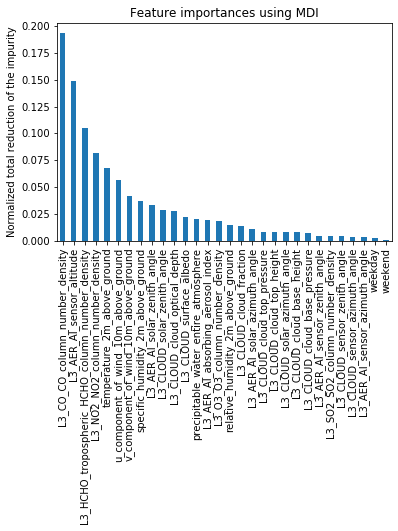

In [65]:
variables = list(train_data.columns)
variables.remove('target')
v_i = pd.Series(importances, index= variables).sort_values(ascending= False)

v_i.plot.bar()
plt.title("Feature importances using MDI")
plt.ylabel("Normalized total reduction of the impurity")

#### Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
reg = GradientBoostingRegressor(learning_rate= 1,
                                n_estimators= 10,
                                init= None,
                                
                                random_state= 0,
                                verbose= 2,
                                
                                min_samples_split= 2,
                                min_samples_leaf= 1,
                                max_depth= 3,
                               )

reg.fit(x_train, y_train)

/home/marwen/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


      Iter       Train Loss   Remaining Time 
         1        1663.6306            2.73s
         2        1534.1328            2.34s
         3        1434.9299            1.99s
         4        1375.0486            1.75s
         5        1323.2363            1.44s
         6        1298.9404            1.15s
         7        1275.5274            0.86s
         8        1255.9938            0.58s
         9        1238.5264            0.29s
        10        1224.5076            0.00s


GradientBoostingRegressor(learning_rate=1, n_estimators=10, random_state=0,
                          verbose=2)

In [22]:
# evaluation

print('RMSE on training data:', mean_squared_error(y_train, reg.predict(x_train), squared= False)) #squared= False returns RMSE instead of MSE

print('RMSE on validation data:', mean_squared_error(y_val, reg.predict(x_val), squared= False))

print('R² on validation data:', reg.score(x_val, y_val))

RMSE on training data: 34.99296549554849
RMSE on validation data: 34.71800699700191
R² on validation data: 0.42885609583208983


## Prediction

In [23]:
# define a function that formats new data so that it can be fed to the model

def format_for_prediction(data, features, scaler= False, categorical_features= False, poly_transformer= False):

    # add time features
    
    data['Date'] = pd.to_datetime(data['Date'])

    data['month'] = data['Date'].dt.month

    data['weekday'] = data['Date'].dt.weekday

    data['weekend'] = [1 if i in [5,6] else 0 for i in data['weekday']]

    # select relevant features

    data = data[features]
    
    # Missing values imputation

    data = data.fillna(data.mean())
    
    # generate polynomial and interaction features
    
    if poly_transformer:
        
        x = poly_transformer.fit_transform(data.loc[:, ~data.columns.isin(['weekday', 'weekend'])])

        data = pd.concat([pd.DataFrame(x, columns= poly_transformer.get_feature_names(data.loc[:, ~data.columns.isin(['weekday', 'weekend'])].columns)),
               data[['weekday', 'weekend']]], axis= 1)

    # categorical features
    
    if categorical_features:
        
#         data = pd.get_dummies(data, columns= categorical_features)

#         columns = data.columns
         data[categorical_features] = data[categorical_features].astype(str)
    
    # Normalization
    
    if scaler:
        
        data = scaler.transform(data) # returns a np array
    
    
    return data

#pd.DataFrame(data, columns= columns)

In [24]:
formatted_data = format_for_prediction(raw_test_data, 
                                       features= features, 
                                       categorical_features= ['weekday', 'weekend']
                                       )
formatted_data.shape

(16136, 30)

In [25]:
#predicted_target = [gkr_model.predict(i) for i in formatted_data.values]

predicted_target = reg.predict(formatted_data)

submitted_data = pd.DataFrame({'Place_ID X Date': raw_test_data['Place_ID X Date'],
                               'target': predicted_target})

submitted_data.head()

Place_ID X Date     target
0  0OS9LVX X 2020-01-02  20.853823
1  0OS9LVX X 2020-01-03  29.051769
2  0OS9LVX X 2020-01-04  17.346497
3  0OS9LVX X 2020-01-05  22.117284
4  0OS9LVX X 2020-01-06  17.346497

In [26]:
submitted_data.to_csv('../submission_14', index= False)